In [ ]:
import sklearn, os
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')

# Display the first few rows
print(df.head())

   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0              0.0              0.0              0.0  ...   
4     6.202211    0.0              0.0              1.0              0.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0   

In [ ]:
df.shape

(238687, 47)

In [ ]:
df.describe()

flow_duration  Header_Length  Protocol Type       Duration  \
count  238687.000000   2.386870e+05  238687.000000  238687.000000   
mean        5.907665   7.700997e+04       9.052570      66.345189   
std       327.743332   4.596463e+05       8.902223      14.025283   
min         0.000000   0.000000e+00       0.000000       0.000000   
25%         0.000000   5.400000e+01       6.000000      64.000000   
50%         0.000000   5.400000e+01       6.000000      64.000000   
75%         0.104513   3.368950e+02      14.120000      64.000000   
max     68430.712218   9.809700e+06      47.000000     255.000000   

               Rate         Srate          Drate  fin_flag_number  \
count  2.386870e+05  2.386870e+05  238687.000000    238687.000000   
mean   9.384479e+03  9.384479e+03       0.000005         0.086532   
std    1.007839e+05  1.007839e+05       0.001765         0.281148   
min    0.000000e+00  0.000000e+00       0.000000         0.000000   
25%    2.092589e+00  2.092589e+00       0.000000         0.000000   
50%    1.583922e+01  1.583922e+01       0.000000         0.000000   
75%    1.191466e+02  1.191466e+02       0.000000         0.000000   
max    7.340032e+06  7.340032e+06       0.848465         1.000000   

       syn_flag_number  rst_flag_number  ...            AVG            Std  \
count    238687.000000    238687.000000  ...  238687.000000  238687.000000   
mean          0.206132         0.090646  ...     125.176224      33.734815   
std           0.404527         0.287106  ...     242.662004     163.853279   
min           0.000000         0.000000  ...      42.000000       0.000000   
25%           0.000000         0.000000  ...      50.000000       0.000000   
50%           0.000000         0.000000  ...      54.000000       0.000000   
75%           0.000000         0.000000  ...      54.052576       0.377989   
max           1.000000         1.000000  ...    7861.105079   10996.260915   

            Tot size           IAT         Number       Magnitue  \
count  238687.000000  2.386870e+05  238687.000000  238687.000000   
mean      125.382852  8.315222e+07       9.497295      13.139741   
std       244.789519  1.710828e+07       0.821824       8.657497   
min        42.000000  0.000000e+00       1.000000       9.165151   
25%        50.000000  8.307157e+07       9.500000      10.000000   
50%        54.000000  8.312452e+07       9.500000      10.392305   
75%        54.060000  8.334389e+07       9.500000      10.396749   
max     13098.000000  1.676394e+08      14.500000     120.975449   

              Radius    Covariance       Variance         Weight  
count  238687.000000  2.386870e+05  238687.000000  238687.000000  
mean       47.667800  3.197953e+04       0.097020     141.480307  
std       231.716734  4.478592e+05       0.234105      21.137449  
min         0.000000  0.000000e+00       0.000000       1.000000  
25%         0.000000  0.000000e+00       0.000000     141.550000  
50%         0.000000  0.000000e+00       0.000000     141.550000  
75%         0.505921  1.405767e+00       0.080000     141.550000  
max     15551.061321  1.372844e+08       1.000000     244.600000  

[8 rows x 46 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238687 entries, 0 to 238686
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    238687 non-null  float64
 1   Header_Length    238687 non-null  float64
 2   Protocol Type    238687 non-null  float64
 3   Duration         238687 non-null  float64
 4   Rate             238687 non-null  float64
 5   Srate            238687 non-null  float64
 6   Drate            238687 non-null  float64
 7   fin_flag_number  238687 non-null  float64
 8   syn_flag_number  238687 non-null  float64
 9   rst_flag_number  238687 non-null  float64
 10  psh_flag_number  238687 non-null  float64
 11  ack_flag_number  238687 non-null  float64
 12  ece_flag_number  238687 non-null  float64
 13  cwr_flag_number  238687 non-null  float64
 14  ack_count        238687 non-null  float64
 15  syn_count        238687 non-null  float64
 16  fin_count        238687 non-null  floa

In [ ]:
df['label'].unique()

array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
       'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
       'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
       'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

In [ ]:
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
filtered_classes = [
    'DDoS-RSTFINFlood', 'DDoS-PSHACK_Flood', 'DDoS-SYN_Flood',
    'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-ICMP_Flood',
    'DDoS-SynonymousIP_Flood', 'DDoS-ACK_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ICMP_Fragmentation',
    'DDoS-SlowLoris', 'DDoS-HTTP_Flood','BenignTraffic'
]

In [ ]:
df_ddos = df[df['label'].isin(filtered_classes)]

In [ ]:
df_ddos

flow_duration  Header_Length  Protocol Type  Duration        Rate  \
0            0.000000          54.00           6.00     64.00    0.329807   
2            0.000000           0.00           1.00     64.00   33.396799   
6            1.052463         108.00           6.00     64.00    1.902353   
9            0.000000          54.20           6.00     64.00   11.243547   
10           0.223192          61.54           6.11     64.64    9.087882   
...               ...            ...            ...       ...         ...   
238682       0.000000          54.00           6.00     64.00    3.049186   
238683       0.000000          54.00           6.00     64.00  183.433732   
238684       0.000785          56.29           6.11     64.00  306.952216   
238685       0.000901          72.09           6.11     64.64  158.475986   
238686       0.000000           0.00           1.00     64.00    1.291274   

             Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0         0.329807    0.0              1.0              0.0              1.0   
2        33.396799    0.0              0.0              0.0              0.0   
6         1.902353    0.0              0.0              1.0              0.0   
9        11.243547    0.0              0.0              1.0              0.0   
10        9.087882    0.0              0.0              0.0              0.0   
...            ...    ...              ...              ...              ...   
238682    3.049186    0.0              1.0              0.0              1.0   
238683  183.433732    0.0              0.0              0.0              0.0   
238684  306.952216    0.0              0.0              1.0              0.0   
238685  158.475986    0.0              0.0              0.0              0.0   
238686    1.291274    0.0              0.0              0.0              0.0   

        ...       Std  Tot size           IAT  Number   Magnitue    Radius  \
0       ...  0.000000     54.00  8.334383e+07     9.5  10.392305  0.000000   
2       ...  0.000000     42.00  8.312799e+07     9.5   9.165151  0.000000   
6       ...  0.000000     54.00  8.336548e+07     9.5  10.392305  0.000000   
9       ...  0.619849     54.20  8.308906e+07     9.5  10.409168  0.878113   
10      ...  1.692073     54.77  8.333087e+07     9.5  10.434347  2.398780   
...     ...       ...       ...           ...     ...        ...       ...   
238682  ...  0.000000     54.00  8.334449e+07     9.5  10.392305  0.000000   
238683  ...  0.000000     54.00  8.331392e+07     9.5  10.392305  0.000000   
238684  ...  0.140764     54.21  8.308883e+07     9.5  10.395538  0.200659   
238685  ...  2.450404     55.48  8.333177e+07     9.5  10.456522  3.475801   
238686  ...  0.000000     42.00  8.312453e+07     9.5   9.165151  0.000000   

        Covariance  Variance  Weight                    label  
0         0.000000      0.00  141.55         DDoS-RSTFINFlood  
2         0.000000      0.00  141.55          DDoS-ICMP_Flood  
6         0.000000      0.00  141.55  DDoS-SynonymousIP_Flood  
9         3.254011      0.12  141.55           DDoS-SYN_Flood  
10       32.140680      0.09  141.55        DDoS-PSHACK_Flood  
...            ...       ...     ...                      ...  
238682    0.000000      0.00  141.55         DDoS-RSTFINFlood  
238683    0.000000      0.00  141.55        DDoS-PSHACK_Flood  
238684    0.671167      0.03  141.55           DDoS-SYN_Flood  
238685   55.994224      0.17  141.55        DDoS-PSHACK_Flood  
238686    0.000000      0.00  141.55          DDoS-ICMP_Flood  

[179377 rows x 47 columns]

In [ ]:
df_ddos.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
df_ddos['label'].unique()

array(['DDoS-RSTFINFlood', 'DDoS-ICMP_Flood', 'DDoS-SynonymousIP_Flood',
       'DDoS-SYN_Flood', 'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood',
       'DDoS-UDP_Flood', 'BenignTraffic', 'DDoS-ACK_Fragmentation',
       'DDoS-ICMP_Fragmentation', 'DDoS-UDP_Fragmentation',
       'DDoS-HTTP_Flood', 'DDoS-SlowLoris'], dtype=object)

In [ ]:
df_ddos.info()



<class 'pandas.core.frame.DataFrame'>
Index: 179377 entries, 0 to 238686
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    179377 non-null  float64
 1   Header_Length    179377 non-null  float64
 2   Protocol Type    179377 non-null  float64
 3   Duration         179377 non-null  float64
 4   Rate             179377 non-null  float64
 5   Srate            179377 non-null  float64
 6   Drate            179377 non-null  float64
 7   fin_flag_number  179377 non-null  float64
 8   syn_flag_number  179377 non-null  float64
 9   rst_flag_number  179377 non-null  float64
 10  psh_flag_number  179377 non-null  float64
 11  ack_flag_number  179377 non-null  float64
 12  ece_flag_number  179377 non-null  float64
 13  cwr_flag_number  179377 non-null  float64
 14  ack_count        179377 non-null  float64
 15  syn_count        179377 non-null  float64
 16  fin_count        179377 non-null  float64
 

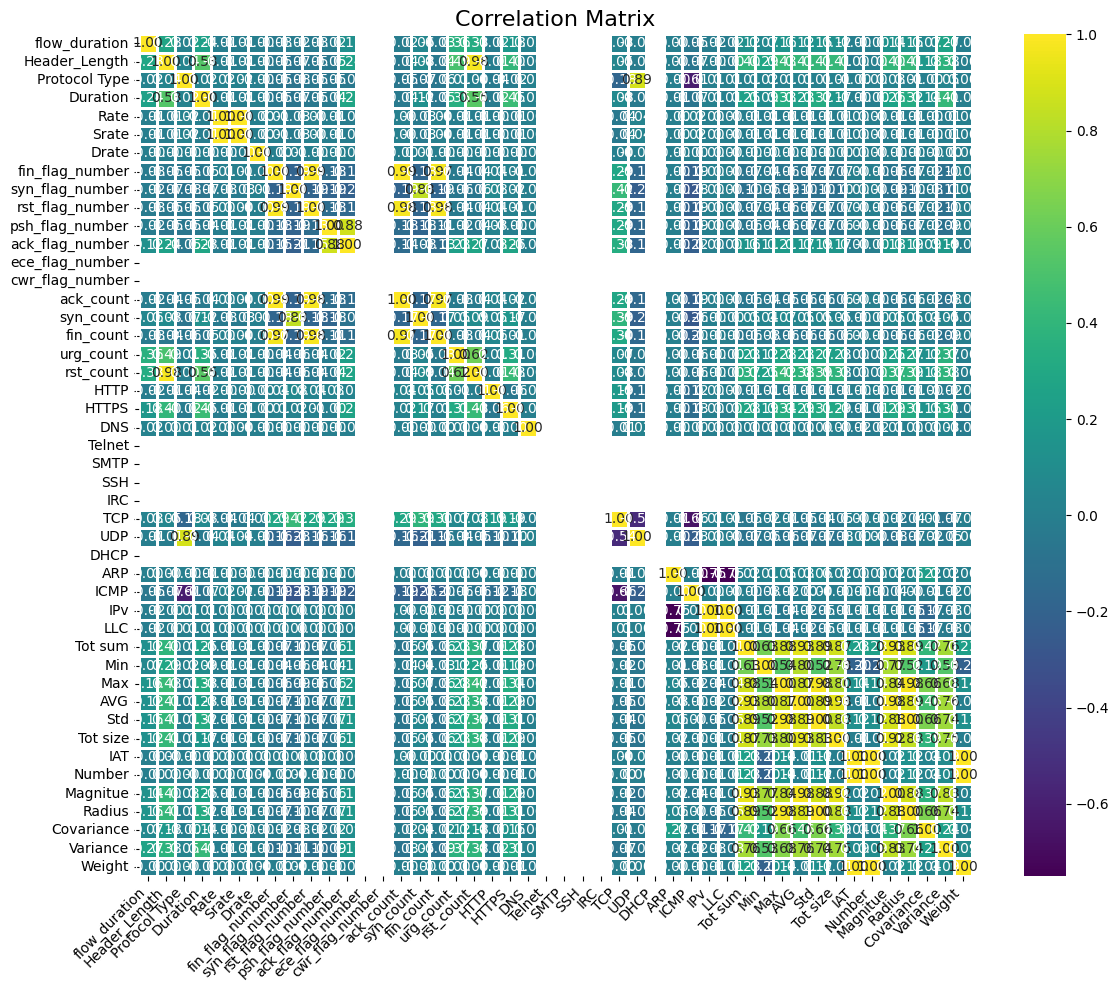

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming scaled_df is your DataFrame containing scaled data
# Compute the correlation matrix
df_features= df_ddos.drop('label', axis=1)

corr_matrix = df_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with seaborn using a different color map
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1, linecolor='white')

# Customize the plot
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


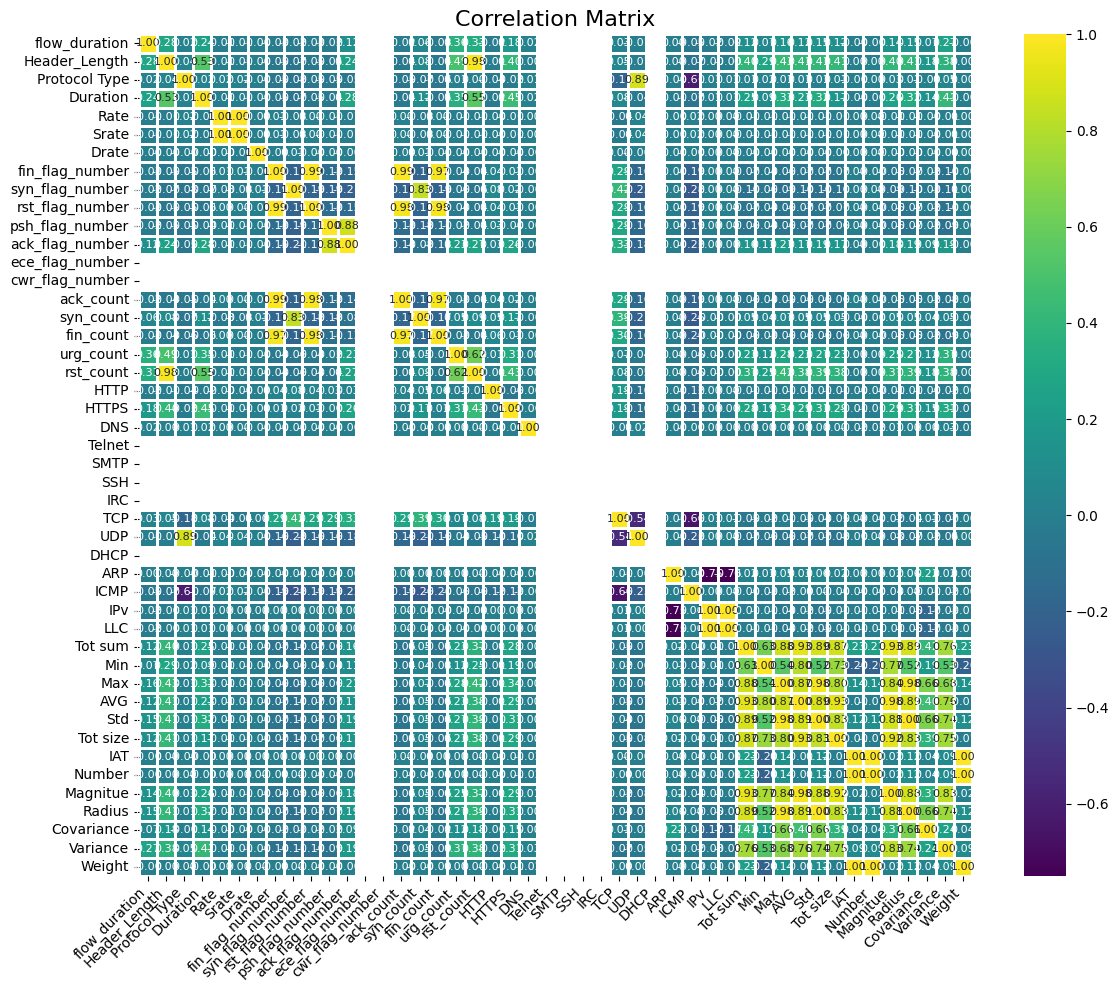

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ddos is your DataFrame containing the data
# Compute the correlation matrix, excluding the label column
df_features = df_ddos.drop('label', axis=1)
corr_matrix = df_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with seaborn using a different color map
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', annot_kws={"size": 8}, linewidths=1, linecolor='white')

# Customize the plot
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# List of columns to drop
columns_to_drop = ['ece_flag_number', 'cwr_flag_number', 'Telnet','SMTP','SSH','IRC','UDP']

# Drop the specified columns
df_cleaned = df_ddos.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print("DataFrame after dropping columns:")
print(df_cleaned.head())

DataFrame after dropping columns:
    flow_duration  Header_Length  Protocol Type  Duration       Rate  \
0        0.000000          54.00           6.00     64.00   0.329807   
2        0.000000           0.00           1.00     64.00  33.396799   
6        1.052463         108.00           6.00     64.00   1.902353   
9        0.000000          54.20           6.00     64.00  11.243547   
10       0.223192          61.54           6.11     64.64   9.087882   

        Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0    0.329807    0.0              1.0              0.0              1.0  ...   
2   33.396799    0.0              0.0              0.0              0.0  ...   
6    1.902353    0.0              0.0              1.0              0.0  ...   
9   11.243547    0.0              0.0              1.0              0.0  ...   
10   9.087882    0.0              0.0              0.0              0.0  ...   

         Std  Tot size           IAT  Number   Magni

In [ ]:
df_cleaned.shape


(179377, 40)

In [ ]:
df_cleaned.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
TCP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
df_cleaned

flow_duration  Header_Length  Protocol Type  Duration        Rate  \
0            0.000000          54.00           6.00     64.00    0.329807   
2            0.000000           0.00           1.00     64.00   33.396799   
6            1.052463         108.00           6.00     64.00    1.902353   
9            0.000000          54.20           6.00     64.00   11.243547   
10           0.223192          61.54           6.11     64.64    9.087882   
...               ...            ...            ...       ...         ...   
238682       0.000000          54.00           6.00     64.00    3.049186   
238683       0.000000          54.00           6.00     64.00  183.433732   
238684       0.000785          56.29           6.11     64.00  306.952216   
238685       0.000901          72.09           6.11     64.64  158.475986   
238686       0.000000           0.00           1.00     64.00    1.291274   

             Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0         0.329807    0.0              1.0              0.0              1.0   
2        33.396799    0.0              0.0              0.0              0.0   
6         1.902353    0.0              0.0              1.0              0.0   
9        11.243547    0.0              0.0              1.0              0.0   
10        9.087882    0.0              0.0              0.0              0.0   
...            ...    ...              ...              ...              ...   
238682    3.049186    0.0              1.0              0.0              1.0   
238683  183.433732    0.0              0.0              0.0              0.0   
238684  306.952216    0.0              0.0              1.0              0.0   
238685  158.475986    0.0              0.0              0.0              0.0   
238686    1.291274    0.0              0.0              0.0              0.0   

        ...       Std  Tot size           IAT  Number   Magnitue    Radius  \
0       ...  0.000000     54.00  8.334383e+07     9.5  10.392305  0.000000   
2       ...  0.000000     42.00  8.312799e+07     9.5   9.165151  0.000000   
6       ...  0.000000     54.00  8.336548e+07     9.5  10.392305  0.000000   
9       ...  0.619849     54.20  8.308906e+07     9.5  10.409168  0.878113   
10      ...  1.692073     54.77  8.333087e+07     9.5  10.434347  2.398780   
...     ...       ...       ...           ...     ...        ...       ...   
238682  ...  0.000000     54.00  8.334449e+07     9.5  10.392305  0.000000   
238683  ...  0.000000     54.00  8.331392e+07     9.5  10.392305  0.000000   
238684  ...  0.140764     54.21  8.308883e+07     9.5  10.395538  0.200659   
238685  ...  2.450404     55.48  8.333177e+07     9.5  10.456522  3.475801   
238686  ...  0.000000     42.00  8.312453e+07     9.5   9.165151  0.000000   

        Covariance  Variance  Weight                    label  
0         0.000000      0.00  141.55         DDoS-RSTFINFlood  
2         0.000000      0.00  141.55          DDoS-ICMP_Flood  
6         0.000000      0.00  141.55  DDoS-SynonymousIP_Flood  
9         3.254011      0.12  141.55           DDoS-SYN_Flood  
10       32.140680      0.09  141.55        DDoS-PSHACK_Flood  
...            ...       ...     ...                      ...  
238682    0.000000      0.00  141.55         DDoS-RSTFINFlood  
238683    0.000000      0.00  141.55        DDoS-PSHACK_Flood  
238684    0.671167      0.03  141.55           DDoS-SYN_Flood  
238685   55.994224      0.17  141.55        DDoS-PSHACK_Flood  
238686    0.000000      0.00  141.55          DDoS-ICMP_Flood  

[179377 rows x 40 columns]

<ipython-input-28-9b82e13c6fe5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast


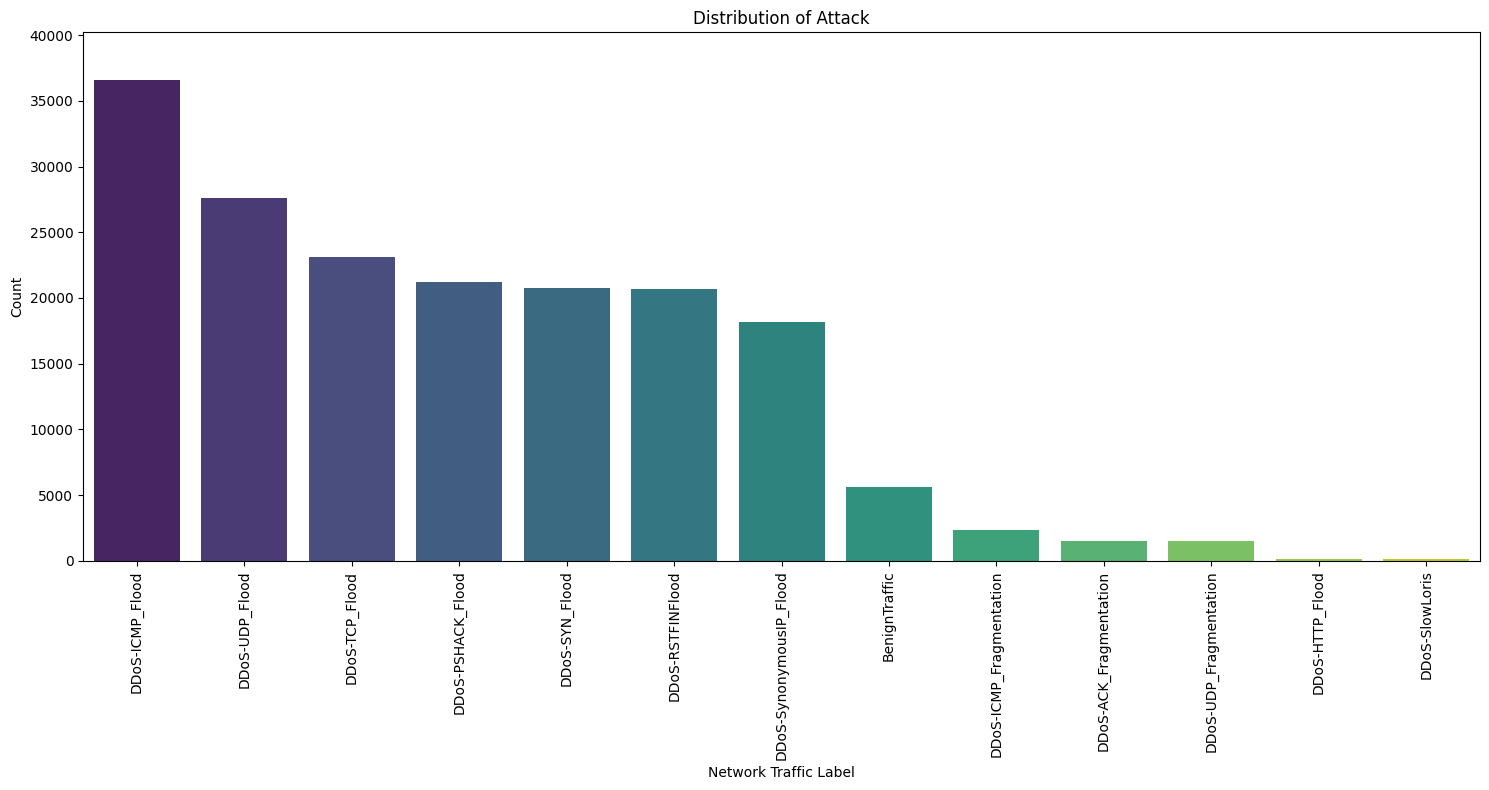

In [ ]:
class_counts = df_cleaned['label'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 8))  # Increased figure size for better readability
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast
plt.title('Distribution of Attack')
plt.xlabel('Network Traffic Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Changed rotation to 90 degrees to prevent overlapping

# Set a variable for the maximum height of the y-axis, slightly more than the highest bar
max_height = max(class_counts.values) * 1.1
plt.ylim(0, max_height)  # Set the y-axis limit to accommodate the percentage annotations




plt.tight_layout()

In [ ]:
from imblearn.over_sampling import SMOTE


# Assuming 'label' is the target column
X1111 = df_cleaned.drop('label', axis=1)
y1111 = df_cleaned['label']



# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled11, y_resampled11 = smote.fit_resample(X1111, y1111)

# Merge resampled features and labels into a new DataFrame
df_resampled11 = pd.concat([pd.DataFrame(X_resampled11, columns=X1111.columns), pd.Series(y_resampled11, name='label')], axis=1)

<ipython-input-30-c5e207815c9d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast


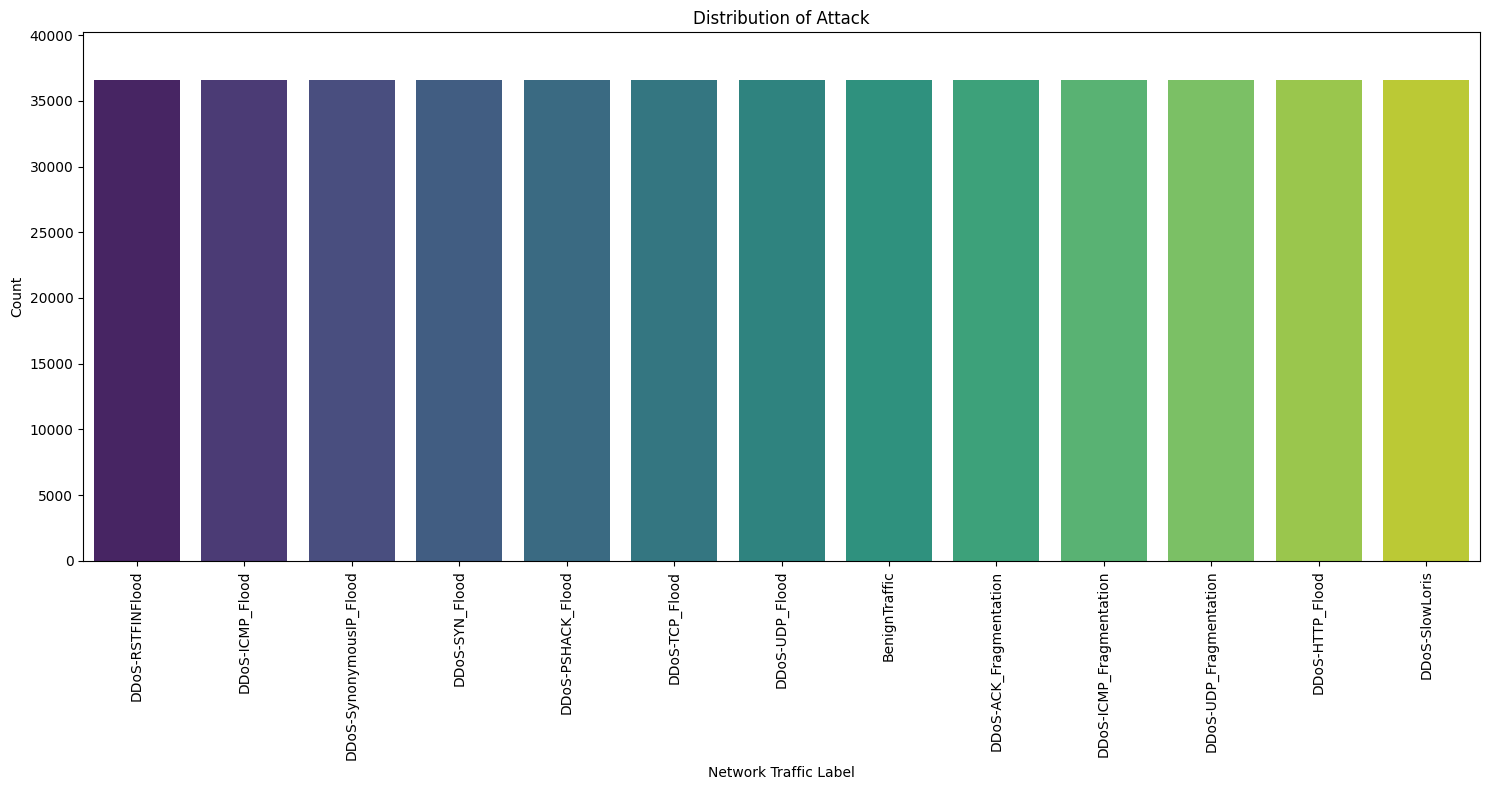

In [ ]:
class_counts = df_resampled11['label'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 8))  # Increased figure size for better readability
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast
plt.title('Distribution of Attack')
plt.xlabel('Network Traffic Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Changed rotation to 90 degrees to prevent overlapping

# Set a variable for the maximum height of the y-axis, slightly more than the highest bar
max_height = max(class_counts.values) * 1.1
plt.ylim(0, max_height)  # Set the y-axis limit to accommodate the percentage annotations




plt.tight_layout()

In [ ]:
df_cleaned.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
TCP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
df_cleaned.to_csv('only_ddos_data.csv',index=False)

In [ ]:
df_only_ddos = pd.read_csv("only_ddos_data.csv")
df_only_ddos

flow_duration  Header_Length  Protocol Type  Duration        Rate  \
0            0.000000          54.00           6.00     64.00    0.329807   
1            0.000000           0.00           1.00     64.00   33.396799   
2            1.052463         108.00           6.00     64.00    1.902353   
3            0.000000          54.20           6.00     64.00   11.243547   
4            0.223192          61.54           6.11     64.64    9.087882   
...               ...            ...            ...       ...         ...   
179372       0.000000          54.00           6.00     64.00    3.049186   
179373       0.000000          54.00           6.00     64.00  183.433732   
179374       0.000785          56.29           6.11     64.00  306.952216   
179375       0.000901          72.09           6.11     64.64  158.475986   
179376       0.000000           0.00           1.00     64.00    1.291274   

             Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0         0.329807    0.0              1.0              0.0              1.0   
1        33.396799    0.0              0.0              0.0              0.0   
2         1.902353    0.0              0.0              1.0              0.0   
3        11.243547    0.0              0.0              1.0              0.0   
4         9.087882    0.0              0.0              0.0              0.0   
...            ...    ...              ...              ...              ...   
179372    3.049186    0.0              1.0              0.0              1.0   
179373  183.433732    0.0              0.0              0.0              0.0   
179374  306.952216    0.0              0.0              1.0              0.0   
179375  158.475986    0.0              0.0              0.0              0.0   
179376    1.291274    0.0              0.0              0.0              0.0   

        ...       Std  Tot size           IAT  Number   Magnitue    Radius  \
0       ...  0.000000     54.00  8.334383e+07     9.5  10.392305  0.000000   
1       ...  0.000000     42.00  8.312799e+07     9.5   9.165151  0.000000   
2       ...  0.000000     54.00  8.336548e+07     9.5  10.392305  0.000000   
3       ...  0.619849     54.20  8.308906e+07     9.5  10.409168  0.878113   
4       ...  1.692073     54.77  8.333087e+07     9.5  10.434347  2.398780   
...     ...       ...       ...           ...     ...        ...       ...   
179372  ...  0.000000     54.00  8.334449e+07     9.5  10.392305  0.000000   
179373  ...  0.000000     54.00  8.331392e+07     9.5  10.392305  0.000000   
179374  ...  0.140764     54.21  8.308883e+07     9.5  10.395538  0.200659   
179375  ...  2.450404     55.48  8.333177e+07     9.5  10.456522  3.475801   
179376  ...  0.000000     42.00  8.312453e+07     9.5   9.165151  0.000000   

        Covariance  Variance  Weight                    label  
0         0.000000      0.00  141.55         DDoS-RSTFINFlood  
1         0.000000      0.00  141.55          DDoS-ICMP_Flood  
2         0.000000      0.00  141.55  DDoS-SynonymousIP_Flood  
3         3.254011      0.12  141.55           DDoS-SYN_Flood  
4        32.140680      0.09  141.55        DDoS-PSHACK_Flood  
...            ...       ...     ...                      ...  
179372    0.000000      0.00  141.55         DDoS-RSTFINFlood  
179373    0.000000      0.00  141.55        DDoS-PSHACK_Flood  
179374    0.671167      0.03  141.55           DDoS-SYN_Flood  
179375   55.994224      0.17  141.55        DDoS-PSHACK_Flood  
179376    0.000000      0.00  141.55          DDoS-ICMP_Flood  

[179377 rows x 40 columns]

In [ ]:
from imblearn.over_sampling import SMOTE


# Assuming 'label' is the target column
X = df_only_ddos.drop('label', axis=1)
y = df_only_ddos['label']



# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Merge resampled features and labels into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='label')], axis=1)

In [ ]:
df_resampled.to_csv('resampled.csv',index = False)

In [ ]:
df_res = pd.read_csv('resampled.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
features = df_res.drop('label', axis=1)
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
scaled_df = pd.concat([scaled_features, df_res['label']], axis=1)


In [ ]:
scaled_df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
TCP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475202 entries, 0 to 475201
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    475202 non-null  float64
 1   Header_Length    475202 non-null  float64
 2   Protocol Type    475202 non-null  float64
 3   Duration         475202 non-null  float64
 4   Rate             475202 non-null  float64
 5   Srate            475202 non-null  float64
 6   Drate            475202 non-null  float64
 7   fin_flag_number  475202 non-null  float64
 8   syn_flag_number  475202 non-null  float64
 9   rst_flag_number  475202 non-null  float64
 10  psh_flag_number  475202 non-null  float64
 11  ack_flag_number  475202 non-null  float64
 12  ack_count        475202 non-null  float64
 13  syn_count        475202 non-null  float64
 14  fin_count        475202 non-null  float64
 15  urg_count        475202 non-null  float64
 16  rst_count        475202 non-null  floa

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
scaled_df['label_encoder'] = enc.fit_transform(scaled_df['label'])

In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475202 entries, 0 to 475201
Data columns (total 41 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    475202 non-null  float64
 1   Header_Length    475202 non-null  float64
 2   Protocol Type    475202 non-null  float64
 3   Duration         475202 non-null  float64
 4   Rate             475202 non-null  float64
 5   Srate            475202 non-null  float64
 6   Drate            475202 non-null  float64
 7   fin_flag_number  475202 non-null  float64
 8   syn_flag_number  475202 non-null  float64
 9   rst_flag_number  475202 non-null  float64
 10  psh_flag_number  475202 non-null  float64
 11  ack_flag_number  475202 non-null  float64
 12  ack_count        475202 non-null  float64
 13  syn_count        475202 non-null  float64
 14  fin_count        475202 non-null  float64
 15  urg_count        475202 non-null  float64
 16  rst_count        475202 non-null  floa

In [ ]:
scaled_df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS',
       'DNS', 'TCP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight', 'label', 'label_encoder'],
      dtype='object')

In [ ]:
scaled_df_drop_label=scaled_df.drop(['label'],axis=1)

In [ ]:
scaled_df_drop_label.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
TCP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label_encoder      0
dtype: int64

In [ ]:
scaled_df_drop_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475202 entries, 0 to 475201
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    475202 non-null  float64
 1   Header_Length    475202 non-null  float64
 2   Protocol Type    475202 non-null  float64
 3   Duration         475202 non-null  float64
 4   Rate             475202 non-null  float64
 5   Srate            475202 non-null  float64
 6   Drate            475202 non-null  float64
 7   fin_flag_number  475202 non-null  float64
 8   syn_flag_number  475202 non-null  float64
 9   rst_flag_number  475202 non-null  float64
 10  psh_flag_number  475202 non-null  float64
 11  ack_flag_number  475202 non-null  float64
 12  ack_count        475202 non-null  float64
 13  syn_count        475202 non-null  float64
 14  fin_count        475202 non-null  float64
 15  urg_count        475202 non-null  float64
 16  rst_count        475202 non-null  floa

In [ ]:
scaled_df_drop_label['label_encoder'].unique()

array([ 6,  3,  9,  7,  5, 10, 11,  0,  1,  4, 12,  2,  8])

In [ ]:
scaled_df['label'].unique()

array(['DDoS-RSTFINFlood', 'DDoS-ICMP_Flood', 'DDoS-SynonymousIP_Flood',
       'DDoS-SYN_Flood', 'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood',
       'DDoS-UDP_Flood', 'BenignTraffic', 'DDoS-ACK_Fragmentation',
       'DDoS-ICMP_Fragmentation', 'DDoS-UDP_Fragmentation',
       'DDoS-HTTP_Flood', 'DDoS-SlowLoris'], dtype=object)

In [ ]:
X_scaled_pca=scaled_df_drop_label.drop('label_encoder', axis=1)
Y_scaled_pca=scaled_df_drop_label['label_encoder']

In [ ]:
PCA_features=X_scaled_pca.T
covariance_matrix= np.cov(PCA_features)
covariance_matrix

array([[ 1.00000210e+00,  3.49832950e-01,  3.71232407e-02, ...,
         9.23667019e-02,  2.53697595e-01, -9.54865260e-04],
       [ 3.49832950e-01,  1.00000210e+00,  8.60025375e-02, ...,
         1.95190642e-01,  2.26448391e-01, -7.28387401e-03],
       [ 3.71232407e-02,  8.60025375e-02,  1.00000210e+00, ...,
         1.17204596e-02,  8.15142685e-02,  1.26650770e-03],
       ...,
       [ 9.23667019e-02,  1.95190642e-01,  1.17204596e-02, ...,
         1.00000210e+00,  2.60029747e-01,  4.69092466e-02],
       [ 2.53697595e-01,  2.26448391e-01,  8.15142685e-02, ...,
         2.60029747e-01,  1.00000210e+00,  7.06598658e-02],
       [-9.54865260e-04, -7.28387401e-03,  1.26650770e-03, ...,
         4.69092466e-02,  7.06598658e-02,  1.00000210e+00]])

In [ ]:
values, vectors = np.linalg.eig(covariance_matrix)

In [ ]:
values.shape

(39,)

In [ ]:
vectors.shape

(39, 39)

In [ ]:
percentage_variance = []
for i in range(len(values)):
  percentage_variance.append(values[i]/np.sum(values))
percentage_variance

[0.2410831678222704,
 0.10699267244471376,
 0.09358328855459802,
 0.08145484887961836,
 0.07437785666340418,
 0.052837318843438,
 0.051060789760463916,
 0.041793672508189945,
 0.03967312834785932,
 0.03281554144667367,
 0.0264204254198715,
 0.02631246728273131,
 0.02365157882356616,
 0.020309526872710305,
 0.018973248675367923,
 0.01197445283074987,
 0.010409964784289114,
 0.00911335969768726,
 0.007025039012855018,
 0.006078834564827255,
 0.005007467009121123,
 0.004705158870455674,
 0.0035557061765304258,
 0.002497507983320844,
 0.0021028729606016564,
 0.0017063293836427176,
 0.001458636658183509,
 0.0011617055446072875,
 0.0006900938136947973,
 0.0005389660486460788,
 0.00029270062287122445,
 0.0001604071387224884,
 8.545139822468358e-05,
 9.09232341806835e-05,
 4.243083699498124e-06,
 6.46837612055786e-07,
 -1.0013894653625878e-18,
 5.466584641443773e-19,
 0.0]

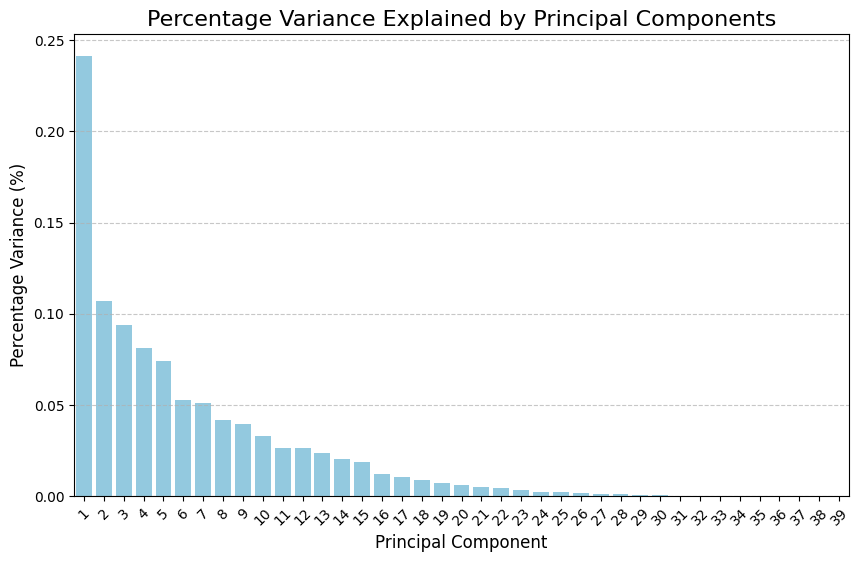

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(percentage_variance) + 1)), y=percentage_variance, color='skyblue')
plt.title('Percentage Variance Explained by Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Percentage Variance (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
projected_1 = X_scaled_pca.dot(vectors.T[0])
projected_2 = X_scaled_pca.dot(vectors.T[1])
projected_3 = X_scaled_pca.dot(vectors.T[2])



result_pca = pd.DataFrame(projected_1, columns= ['PC1'])
result_pca['PC2'] = projected_2
result_pca['PC3'] = projected_3



result_pca['label']= Y_scaled_pca
result_pca

PC1       PC2       PC3  label
0       3.395217  0.269090  5.855853      6
1       1.624292 -1.634747 -0.936314      3
2       2.257673  0.230508 -1.428847      9
3       2.156982 -0.052337 -1.284885      7
4       2.016126  0.616797 -1.089972      5
...          ...       ...       ...    ...
475197 -4.012027 -1.943816  0.293968     12
475198 -3.954214 -1.854774  0.284653     12
475199 -3.761236 -1.824963  0.248418     12
475200 -3.876787 -1.772555  0.266964     12
475201 -4.165511 -1.720175  0.301109     12

[475202 rows x 4 columns]

In [ ]:
result_pca.isnull().sum()

PC1      0
PC2      0
PC3      0
label    0
dtype: int64

<Axes: >

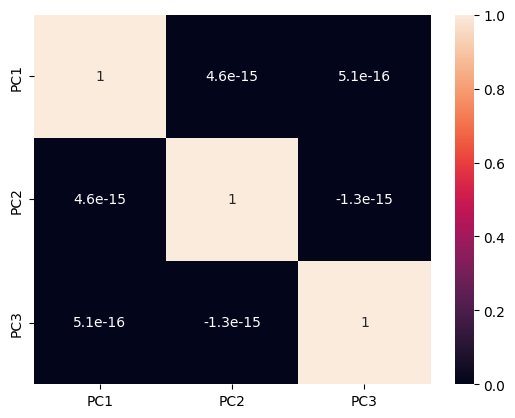

In [ ]:
X_pca_heatmap= result_pca[['PC1','PC2','PC3']]
sns.heatmap(X_pca_heatmap.corr(), annot=True)

<ipython-input-59-94b77f889fbd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast


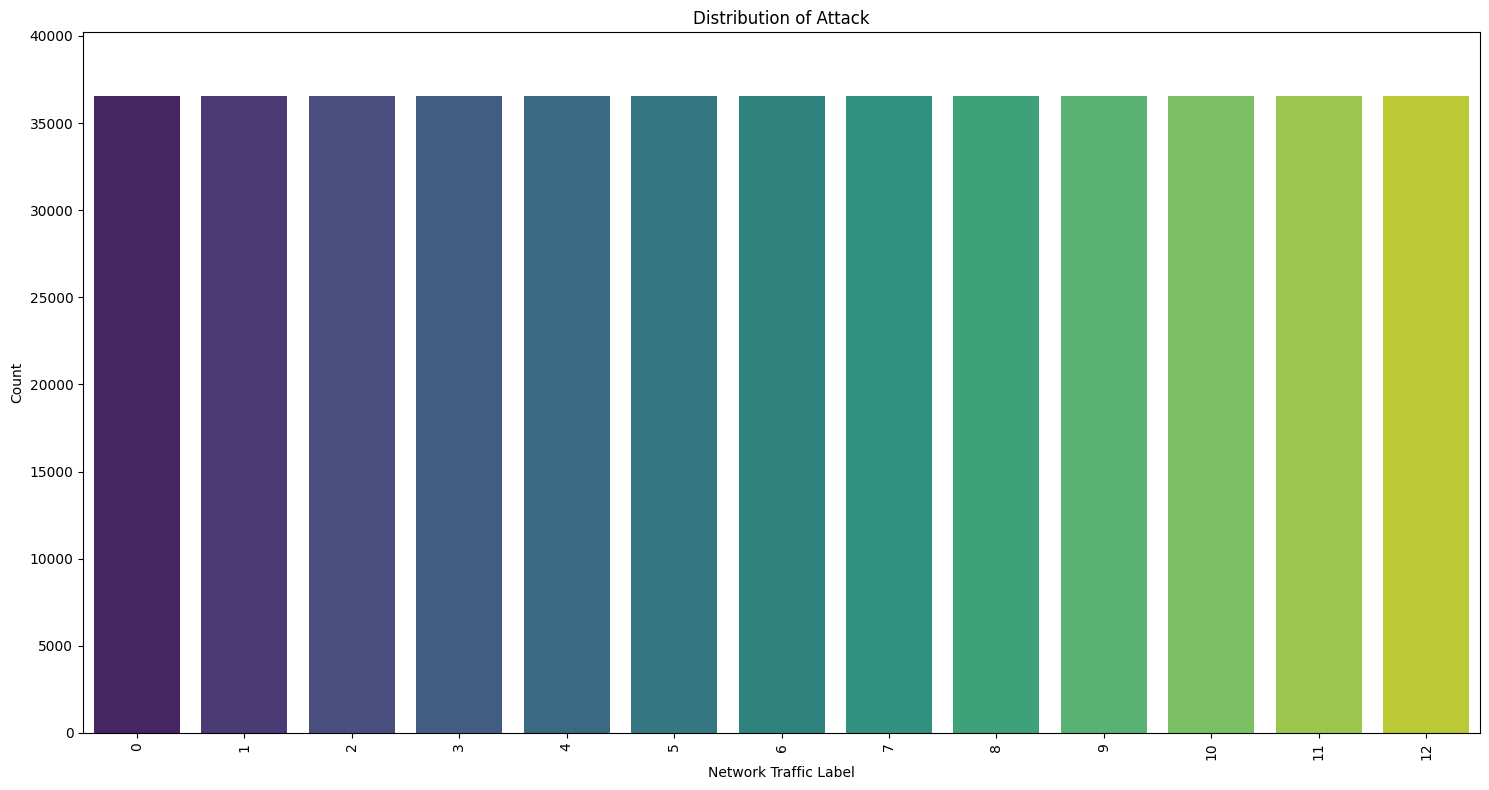

In [ ]:
class_counts = result_pca['label'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 8))  # Increased figure size for better readability
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast
plt.title('Distribution of Attack')
plt.xlabel('Network Traffic Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Changed rotation to 90 degrees to prevent overlapping

# Set a variable for the maximum height of the y-axis, slightly more than the highest bar
max_height = max(class_counts.values) * 1.1
plt.ylim(0, max_height)  # Set the y-axis limit to accommodate the percentage annotations




plt.tight_layout()

Training Time: 24.8979 seconds
Model Size: 3546.11 KB
Memory Usage: 2264.46 MB
Prediction Time: 0.3878 seconds
Accuracy: 0.9471
Precision: 0.9487
Recall: 0.9471
F1-score: 0.9475


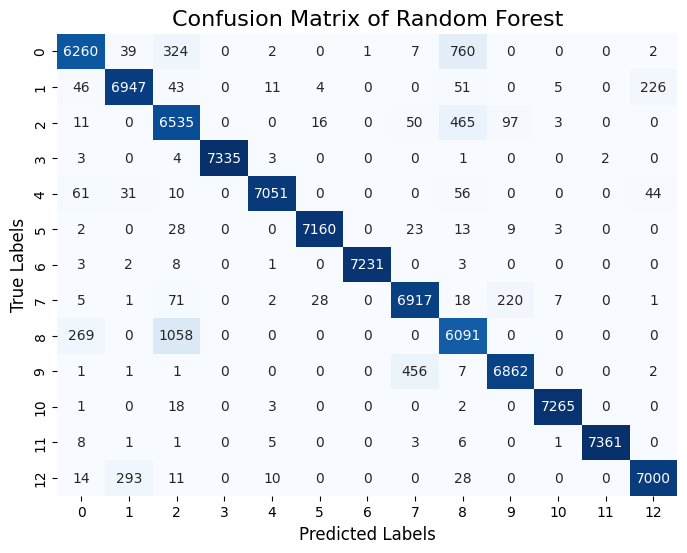

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with optimized parameters
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)

# Measure training time
start_train_time = time.time()
rf_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(rf_classifier, 'rf_model.pkl')
model_size = os.path.getsize('rf_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = rf_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 21.8026 seconds
Model Size: 3546.11 KB
Memory Usage: 2351.01 MB
Prediction Time: 0.3752 seconds
Accuracy: 0.9471
Precision: 0.9487
Recall: 0.9471
F1-score: 0.9475


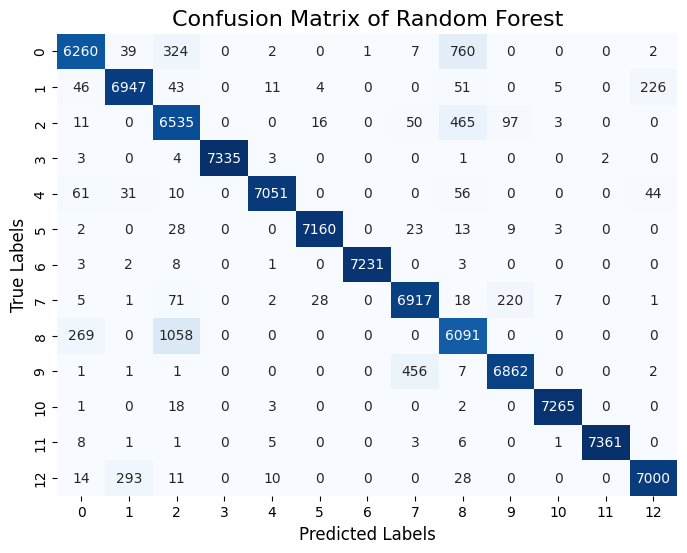

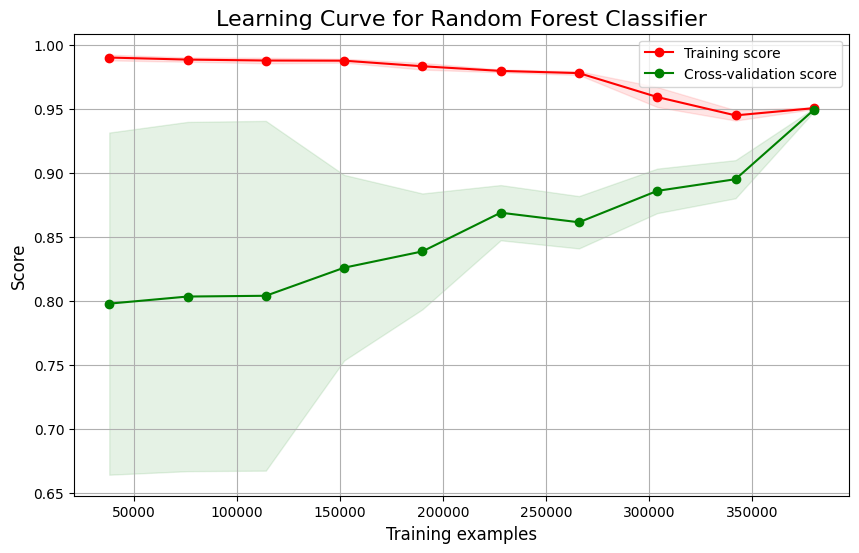

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with optimized parameters
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)

# Measure training time
start_train_time = time.time()
rf_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(rf_classifier, 'rf_model.pkl')
model_size = os.path.getsize('rf_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = rf_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for Random Forest Classifier', fontsize=16)
plt.xlabel('Training examples', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(loc="best")
plt.grid()
plt.show()


Training Time: 0.5580 seconds
Model Size (Training Data Size): 17.40 MB
Memory Usage: 2379.08 MB
Prediction Time: 8.4440 seconds
Accuracy: 0.9808
Precision: 0.9810
Recall: 0.9808
F1-score: 0.9808


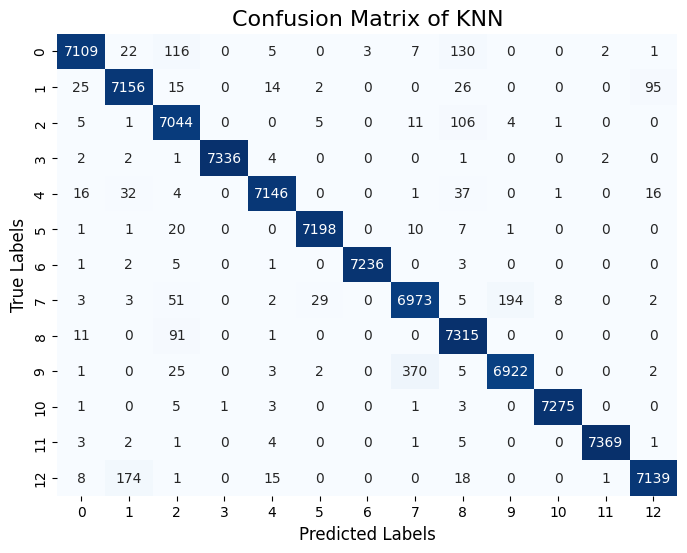

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import os

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Measure training time
start_train_time = time.time()
knn_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = knn_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate model size (size of the training data)
train_data_size = (X_train.memory_usage(deep=True).sum() + y_train.memory_usage(deep=True)) / 1024 ** 2  # Convert bytes to megabytes

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size (Training Data Size): {train_data_size:.2f} MB')
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of KNN', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 0.4946 seconds
Model Size (Training Data Size): 17.40 MB
Memory Usage: 2387.81 MB
Prediction Time: 5.6493 seconds
Accuracy: 0.9808
Precision: 0.9810
Recall: 0.9808
F1-score: 0.9808


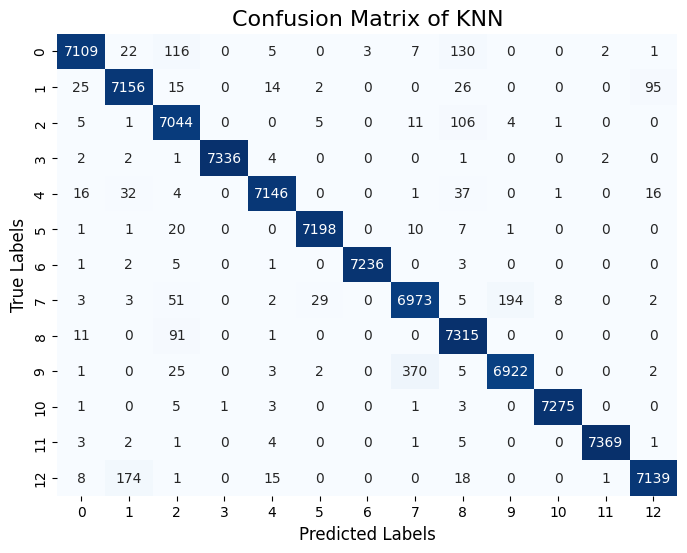

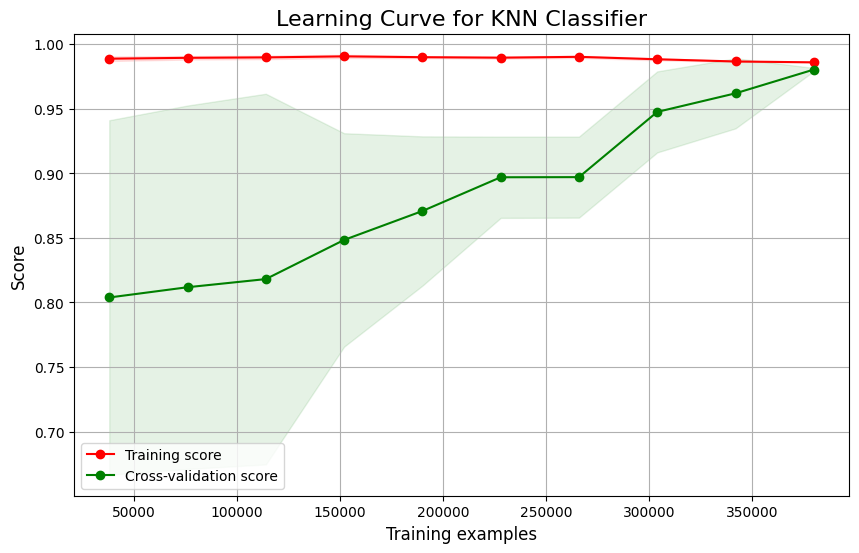

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import os

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Measure training time
start_train_time = time.time()
knn_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = knn_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate model size (size of the training data)
train_data_size = (X_train.memory_usage(deep=True).sum() + y_train.memory_usage(deep=True)) / 1024 ** 2  # Convert bytes to megabytes

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size (Training Data Size): {train_data_size:.2f} MB')
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of KNN', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(knn_classifier, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for KNN Classifier', fontsize=16)
plt.xlabel('Training examples', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
pip install lightgbm scikit-learn


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 380161, number of used features: 3
[LightGBM] [Info] Start training from score -2.567831
[LightGBM] [Info] Start training from score -2.565707
[LightGBM] [Info] Start training from score -2.560383
[LightGBM] [Info] Start training from score -2.566221
[LightGBM] [Info] Start training from score -2.562973
[LightGBM] [Info] Start training from score -2.562461
[LightGBM] [Info] Start training from score -2.562803
[LightGBM] [Info] Start training from score -2.563554
[LightGBM] [Info] Start training from score -2.568620
[LightGBM] [Info] Start training from score -2.565605
[LightGBM] [Info] Start training from score -2.564203
[LightGBM] [Info] Start training from score -2.567523
[LightGBM] [Info] Start training from score -2.566495
Training u

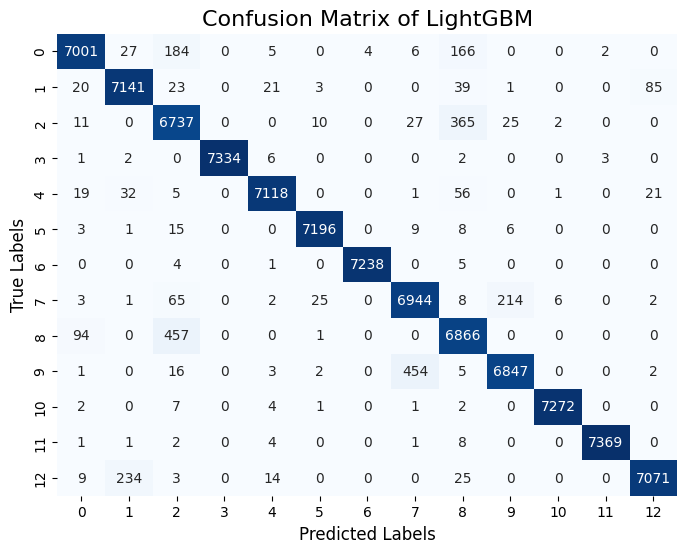

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time
import joblib
import os
import psutil
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'label' is your target variable and the rest are features
X = result_pca.drop('label', axis=1)
Y = result_pca['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',  # Use 'multiclass' for multi-class classification
    'num_class': len(Y.unique()),  # Number of classes
    'metric': 'multi_logloss',  # Use 'multi_logloss' for multi-class classification
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Measure training time
start_train_time = time.time()
bst = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
bst.save_model('lightgbm_model.txt')
model_size = os.path.getsize('lightgbm_model.txt')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Predict on the test set
start_pred_time = time.time()
y_pred_prob = bst.predict(X_test, num_iteration=bst.best_iteration)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time
y_pred = [np.argmax(x) for x in y_pred_prob]  # For multiclass classification

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of LightGBM', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 318.7354 seconds
Model Size: 1.66 KB
Memory Usage: 2410.59 MB
Prediction Time: 0.0300 seconds
Accuracy: 0.8628
Precision: 0.8639
Recall: 0.8628
F1-score: 0.8604


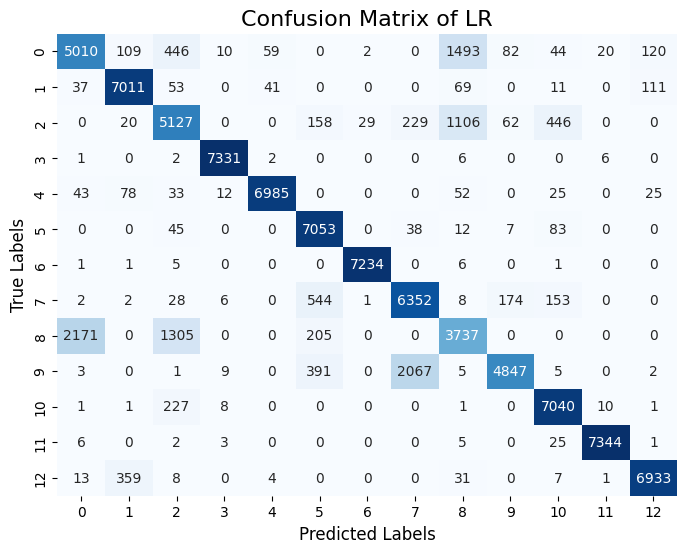

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Measure training time
start_train_time = time.time()
logreg_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(logreg_classifier, 'logreg_model.pkl')
model_size = os.path.getsize('logreg_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Make predictions on the test set
start_pred_time = time.time()
y_pred = logreg_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of LR', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Measure training time
start_train_time = time.time()
logreg_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(logreg_classifier, 'logreg_model.pkl')
model_size = os.path.getsize('logreg_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Make predictions on the test set
start_pred_time = time.time()
y_pred = logreg_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of LR', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(logreg_classifier, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for Logistic Regression Classifier', fontsize=16)
plt.xlabel('Training examples', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(loc="best")
plt.grid()
plt.show()


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Measure training time
start_train_time = time.time()
dt_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(dt_classifier, 'dt_model.pkl')
model_size = os.path.getsize('dt_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = dt_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Decision Tree', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = result_pca.drop('label', axis=1)
Y = result_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Measure training time
start_train_time = time.time()
nb_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(nb_classifier, 'nb_model.pkl')
model_size = os.path.getsize('nb_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = nb_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Naive Bayes', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


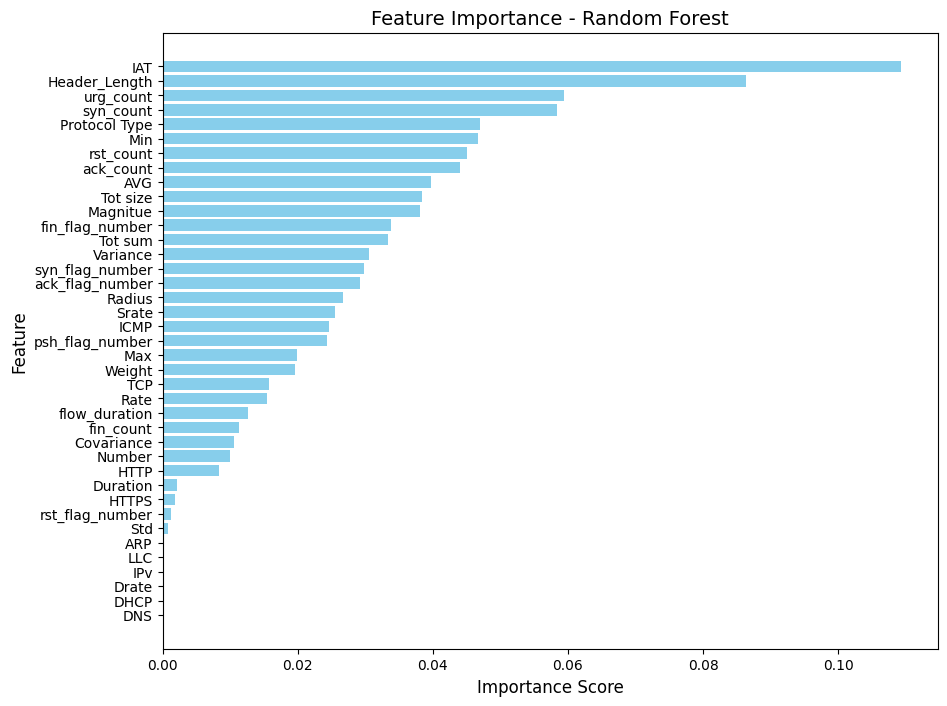

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


X = scaled_df_drop_label.drop('label_encoder', axis=1)
y = scaled_df_drop_label['label_encoder']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Retrieve feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance - Random Forest', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [ ]:
selected_features = ['IAT','Header_Length','urg_count','label_encoder']
rf_scaled_df= scaled_df_drop_label[selected_features]

In [ ]:
rf_scaled_df

IAT  Header_Length  urg_count  label_encoder
0       0.005253      -0.247107  -0.238436              6
1      -0.004064      -0.247226  -0.238436              3
2       0.006188      -0.246988  -0.238436              9
3      -0.005745      -0.247106  -0.238436              7
4       0.004694      -0.247090  -0.219645              5
...          ...            ...        ...            ...
475197  0.006287       0.152350  -0.238436             12
475198  0.006400       0.435802  -0.238436             12
475199  0.006409       0.422685  -0.238427             12
475200  0.006508       0.493611  -0.237988             12
475201  0.006424       1.062156  -0.238436             12

[475202 rows x 4 columns]

In [ ]:
X_rf_scaled_df=rf_scaled_df.drop('label_encoder', axis=1)
Y_rf_scaled_df=rf_scaled_df['label_encoder']
X_rf_scaled_df

IAT  Header_Length  urg_count
0       0.005253      -0.247107  -0.238436
1      -0.004064      -0.247226  -0.238436
2       0.006188      -0.246988  -0.238436
3      -0.005745      -0.247106  -0.238436
4       0.004694      -0.247090  -0.219645
...          ...            ...        ...
475197  0.006287       0.152350  -0.238436
475198  0.006400       0.435802  -0.238436
475199  0.006409       0.422685  -0.238427
475200  0.006508       0.493611  -0.237988
475201  0.006424       1.062156  -0.238436

[475202 rows x 3 columns]

<Axes: >

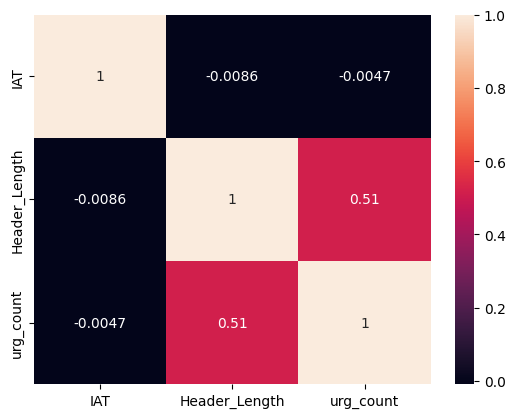

In [ ]:
sns.heatmap(X_rf_scaled_df.corr(), annot=True)

<ipython-input-73-b4a48c1bf0d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast


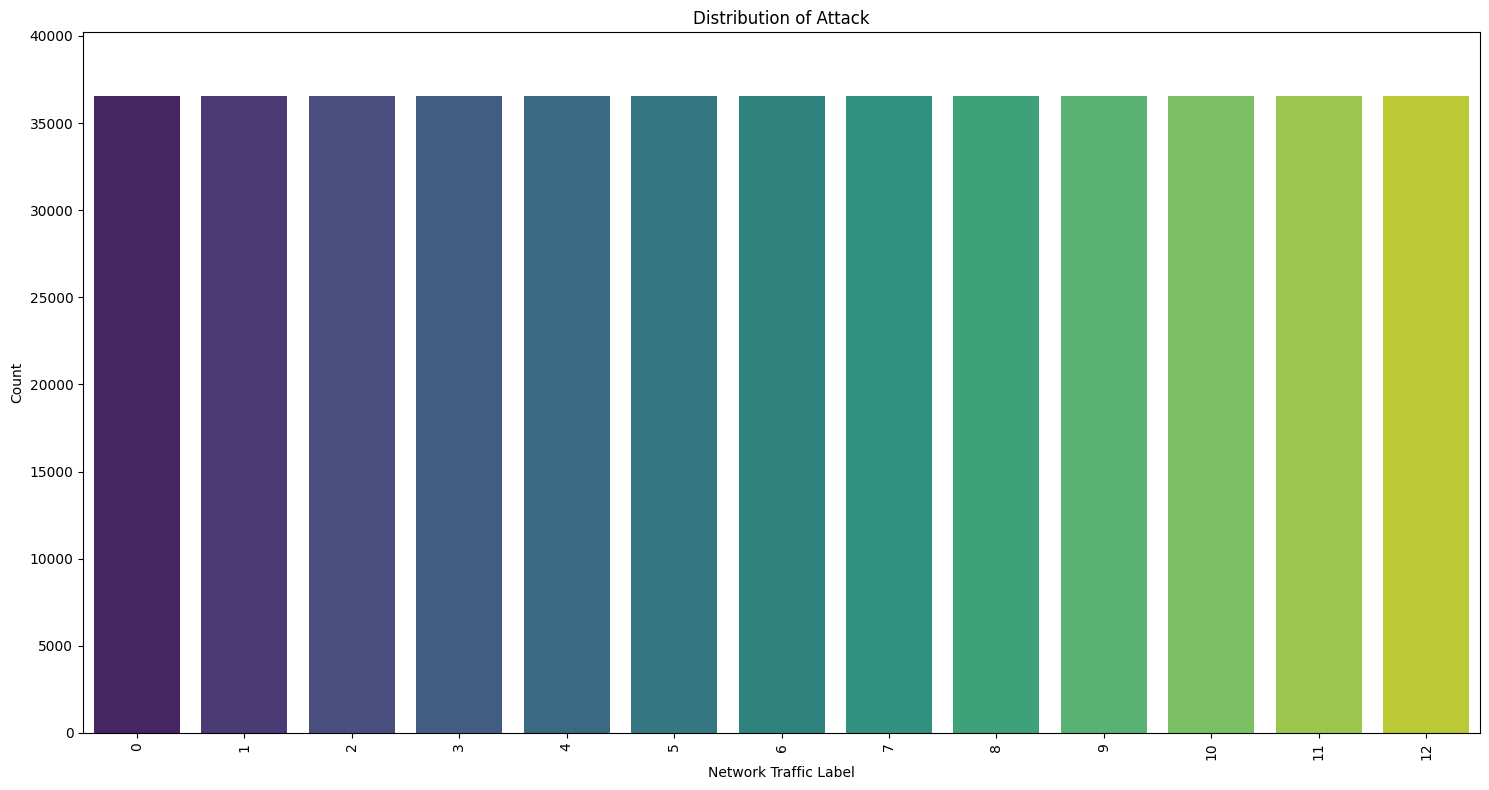

In [ ]:
class_counts = rf_scaled_df['label_encoder'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 8))  # Increased figure size for better readability
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')  # Changed palette for better contrast
plt.title('Distribution of Attack')
plt.xlabel('Network Traffic Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Changed rotation to 90 degrees to prevent overlapping

# Set a variable for the maximum height of the y-axis, slightly more than the highest bar
max_height = max(class_counts.values) * 1.1
plt.ylim(0, max_height)  # Set the y-axis limit to accommodate the percentage annotations




plt.tight_layout()

Training Time: 15.3079 seconds
Model Size: 2666.75 KB
Memory Usage: 2503.05 MB
Prediction Time: 0.3646 seconds
Accuracy: 0.9980
Precision: 0.9980
Recall: 0.9980
F1-score: 0.9980


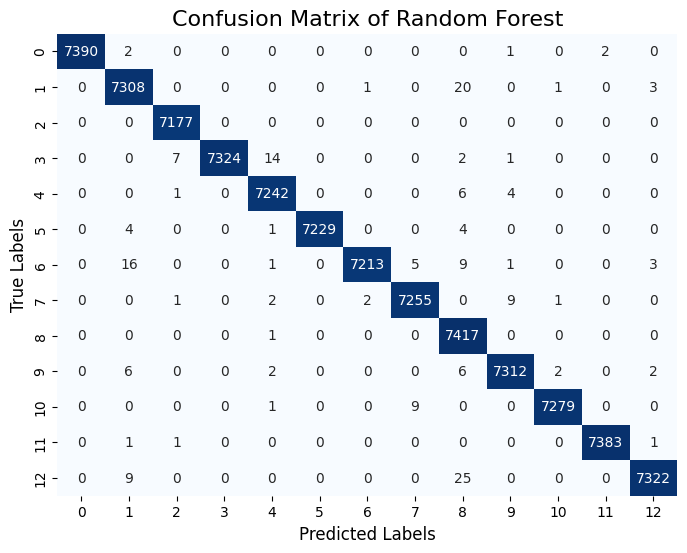

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with optimized parameters
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)

# Measure training time
start_train_time = time.time()
rf_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(rf_classifier, 'rf_model.pkl')
model_size = os.path.getsize('rf_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = rf_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 26.3006 seconds
Model Size: 2666.75 KB
Memory Usage: 2608.49 MB
Prediction Time: 0.6828 seconds
Accuracy: 0.9980
Precision: 0.9980
Recall: 0.9980
F1-score: 0.9980


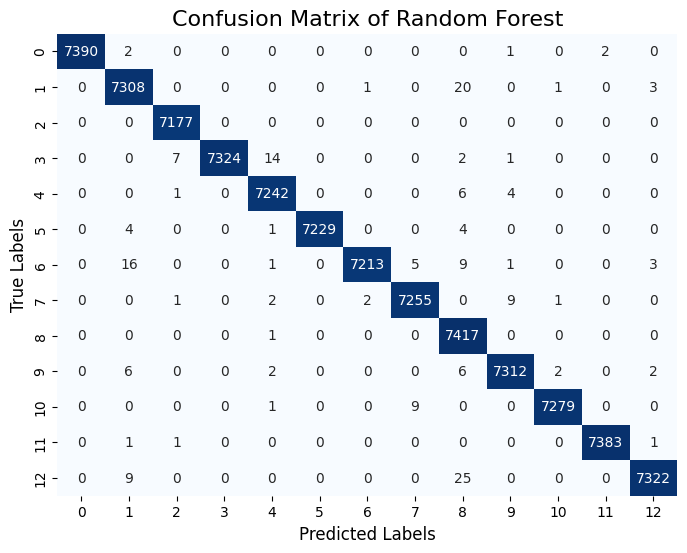

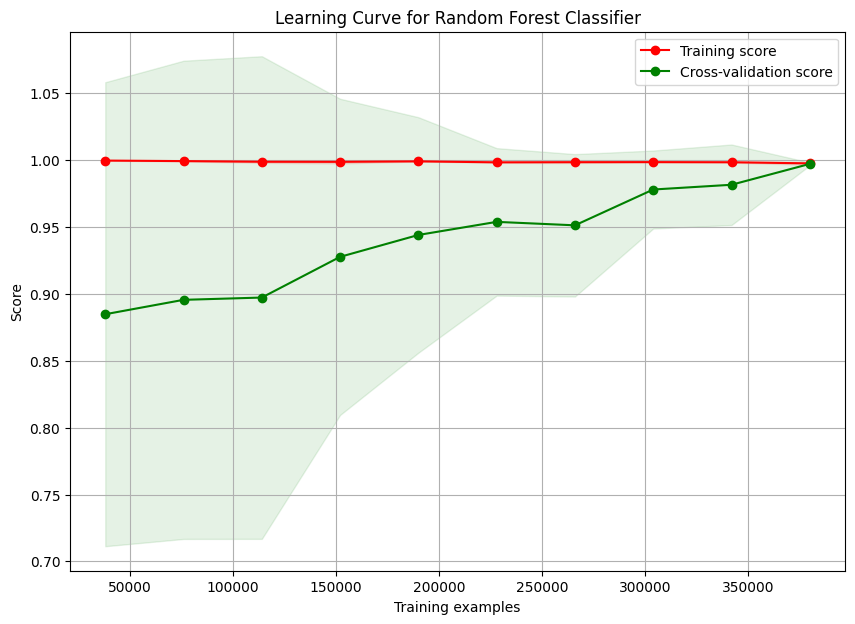

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with optimized parameters
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)

# Measure training time
start_train_time = time.time()
rf_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(rf_classifier, 'rf_model.pkl')
model_size = os.path.getsize('rf_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = rf_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend(loc='best')
plt.grid()
plt.show()


Training Time: 0.5096 seconds
Model Size (Training Data Size): 17.40 MB
Memory Usage: 2540.54 MB
Prediction Time: 9.5053 seconds
Accuracy: 0.9935
Precision: 0.9936
Recall: 0.9935
F1-score: 0.9935


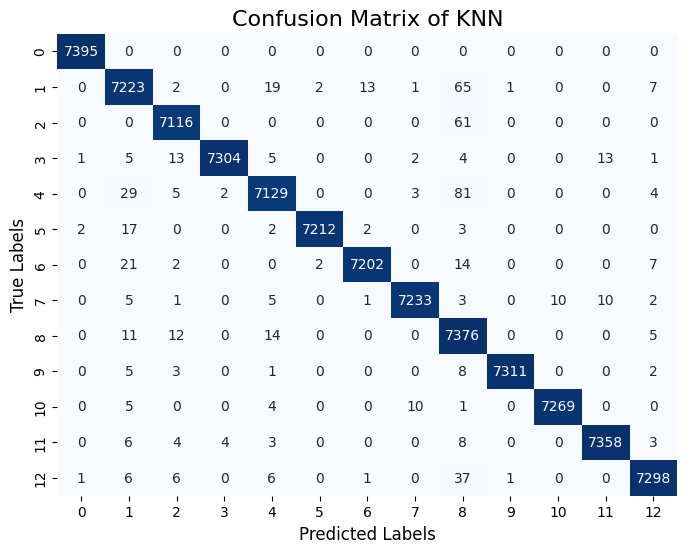

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import os


# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Measure training time
start_train_time = time.time()
knn_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = knn_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate model size (size of the training data)
train_data_size = (X_train.memory_usage(deep=True).sum() + y_train.memory_usage(deep=True)) / 1024 ** 2  # Convert bytes to megabytes

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size (Training Data Size): {train_data_size:.2f} MB')
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of KNN', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

Training Time: 1.1827 seconds
Model Size (Training Data Size): 17.40 MB
Memory Usage: 2554.68 MB
Prediction Time: 15.4248 seconds
Accuracy: 0.9935
Precision: 0.9936
Recall: 0.9935
F1-score: 0.9935


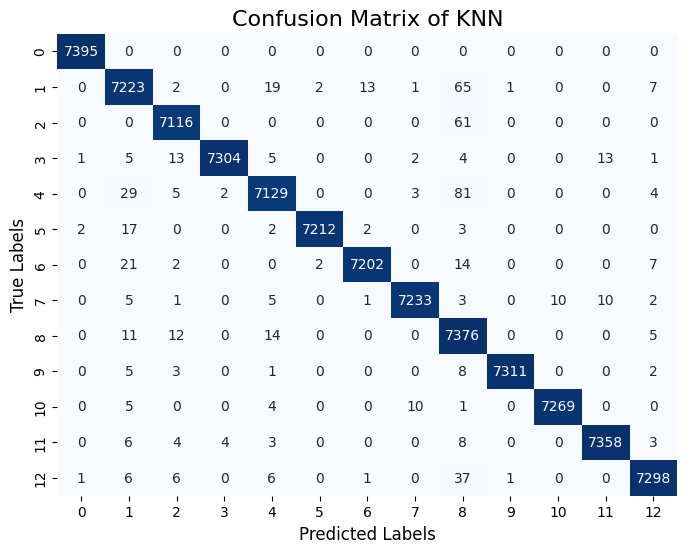

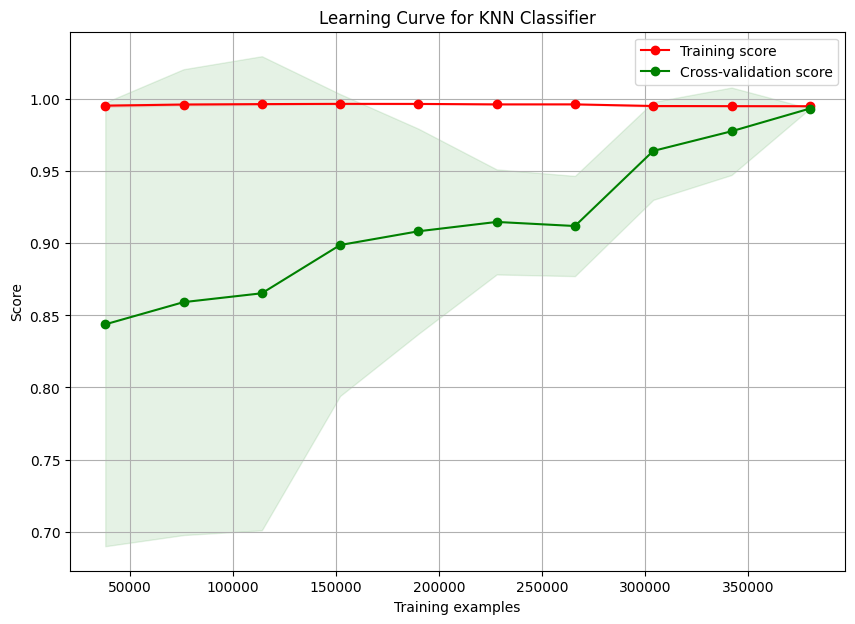

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import os

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Measure training time
start_train_time = time.time()
knn_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = knn_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate model size (size of the training data)
train_data_size = (X_train.memory_usage(deep=True).sum() + y_train.memory_usage(deep=True)) / 1024 ** 2  # Convert bytes to megabytes

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size (Training Data Size): {train_data_size:.2f} MB')
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of KNN', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for KNN Classifier')
plt.legend(loc='best')
plt.grid()
plt.show()


Training Time: 133.7643 seconds
Model Size: 1.67 KB
Memory Usage: 2544.89 MB
Prediction Time: 0.0461 seconds
Accuracy: 0.4040
Precision: 0.3786
Recall: 0.4040
F1-score: 0.3529


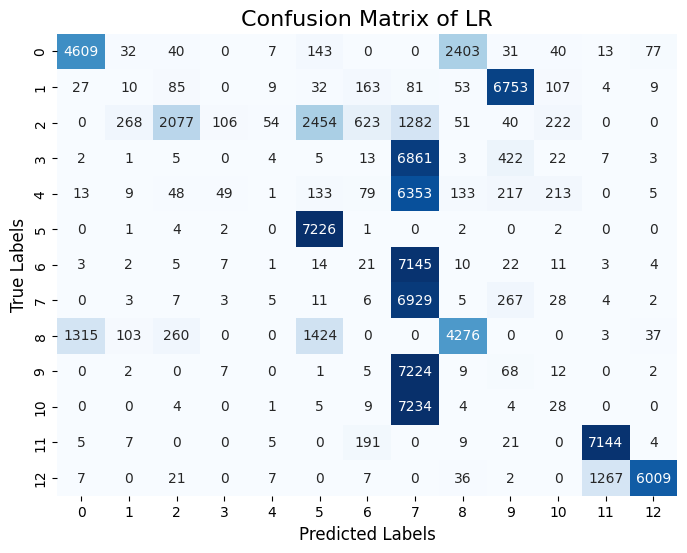

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Measure training time
start_train_time = time.time()
logreg_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(logreg_classifier, 'logreg_model.pkl')
model_size = os.path.getsize('logreg_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Make predictions on the test set
start_pred_time = time.time()
y_pred = logreg_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of LR', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

Training Time: 1.6455 seconds
Model Size: 79.31 KB
Memory Usage: 2554.50 MB
Prediction Time: 0.0187 seconds
Accuracy: 0.9997
Precision: 0.9997
Recall: 0.9997
F1-score: 0.9997


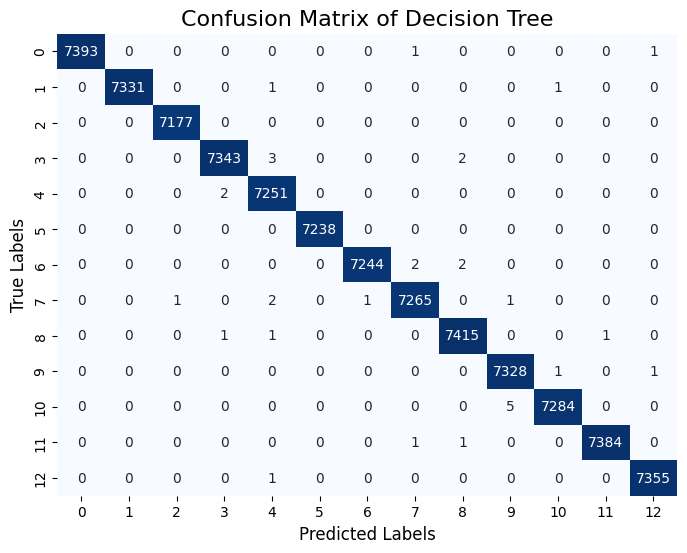

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Measure training time
start_train_time = time.time()
dt_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(dt_classifier, 'dt_model.pkl')
model_size = os.path.getsize('dt_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = dt_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Decision Tree', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Training Time: 1.0769 seconds
Model Size: 79.31 KB
Memory Usage: 2554.50 MB
Prediction Time: 0.0141 seconds
Accuracy: 0.9997
Precision: 0.9997
Recall: 0.9997
F1-score: 0.9997


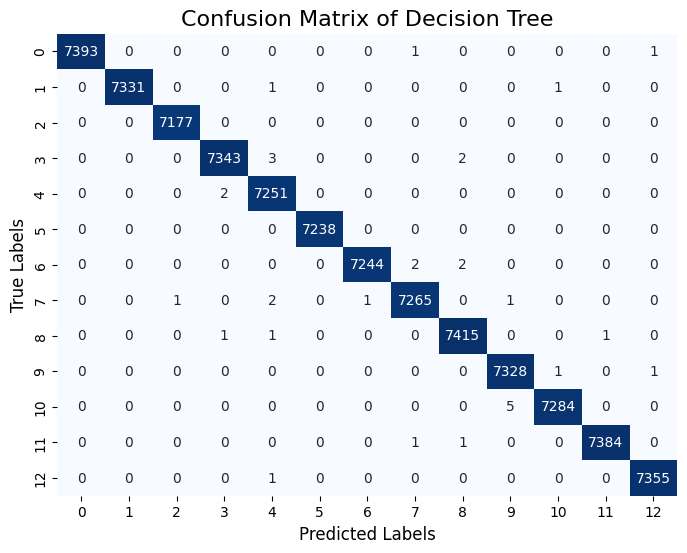

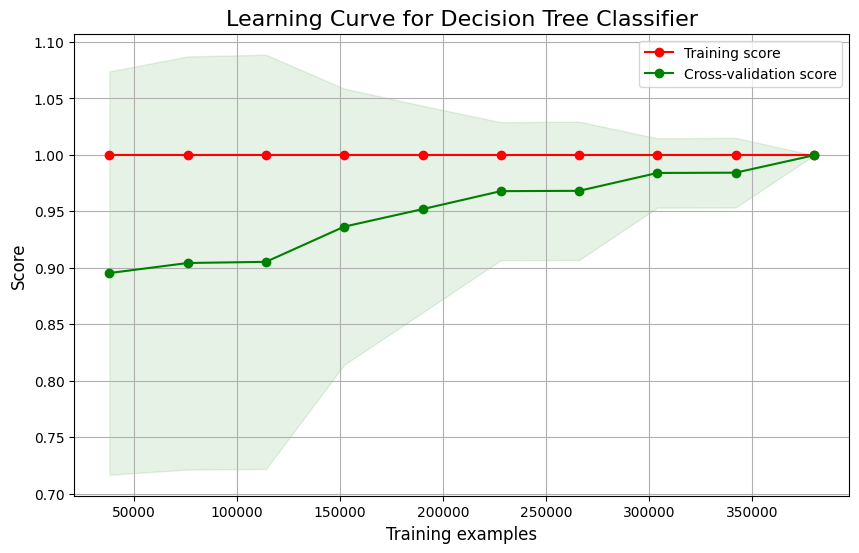

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Measure training time
start_train_time = time.time()
dt_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(dt_classifier, 'dt_model.pkl')
model_size = os.path.getsize('dt_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = dt_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Decision Tree', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(dt_classifier, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for Decision Tree Classifier', fontsize=16)
plt.xlabel('Training examples', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(loc="best")
plt.grid()
plt.show()


Training Time: 0.1730 seconds
Model Size: 1.97 KB
Memory Usage: 2554.67 MB
Prediction Time: 0.0551 seconds
Accuracy: 0.2538
Precision: 0.2741
Recall: 0.2533
F1-score: 0.2173


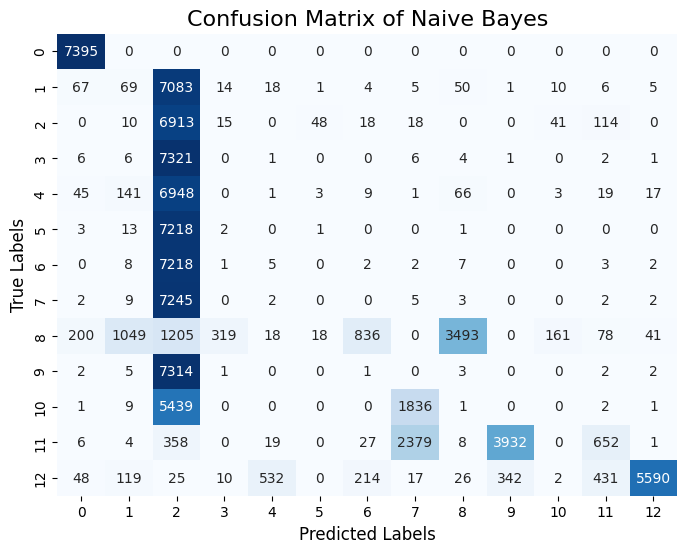

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Measure training time
start_train_time = time.time()
nb_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Save the model to disk
joblib.dump(nb_classifier, 'nb_model.pkl')
model_size = os.path.getsize('nb_model.pkl')

# Measure memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

# Measure prediction time
start_pred_time = time.time()
y_pred = nb_classifier.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Training Time: {training_time:.4f} seconds')
print(f'Model Size: {model_size / 1024:.2f} KB')  # Convert bytes to kilobytes
print(f'Memory Usage: {memory_usage:.2f} MB')
print(f'Prediction Time: {prediction_time:.4f} seconds')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Naive Bayes', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


Random Forest - Training Time: 25.4318 seconds
Random Forest - Model Size: 2666.75 KB
Random Forest - Memory Usage: 2706.04 MB
Random Forest - Prediction Time: 0.8984 seconds
Random Forest - Accuracy: 0.9980
Random Forest - Precision: 0.9980
Random Forest - Recall: 0.9980
Random Forest - F1-score: 0.9980


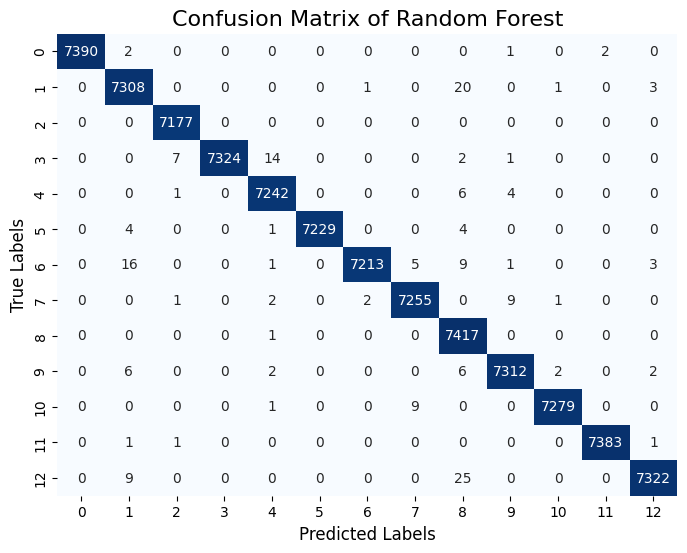

KNN - Training Time: 0.7383 seconds
KNN - Model Size: 25041.83 KB
KNN - Memory Usage: 2716.27 MB
KNN - Prediction Time: 7.5423 seconds
KNN - Accuracy: 0.9935
KNN - Precision: 0.9936
KNN - Recall: 0.9935
KNN - F1-score: 0.9935


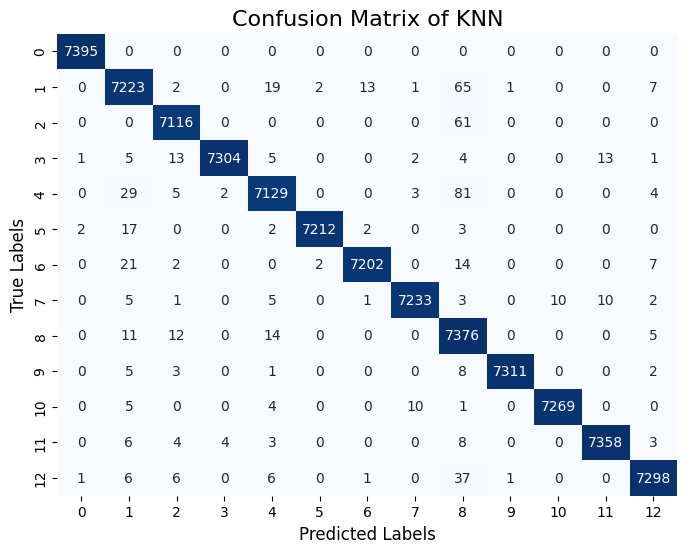

Logistic Regression - Training Time: 132.8468 seconds
Logistic Regression - Model Size: 1.67 KB
Logistic Regression - Memory Usage: 2716.22 MB
Logistic Regression - Prediction Time: 0.0212 seconds
Logistic Regression - Accuracy: 0.4040
Logistic Regression - Precision: 0.3786
Logistic Regression - Recall: 0.4040
Logistic Regression - F1-score: 0.3529


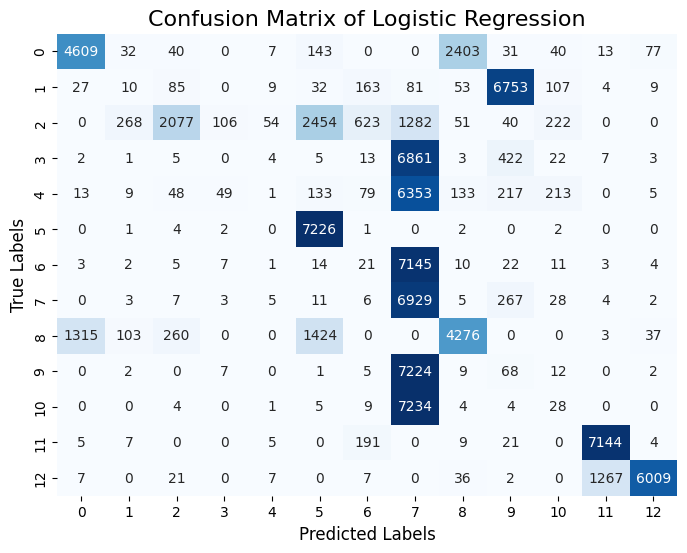

Decision Tree - Training Time: 1.0780 seconds
Decision Tree - Model Size: 55.56 KB
Decision Tree - Memory Usage: 2716.22 MB
Decision Tree - Prediction Time: 0.0128 seconds
Decision Tree - Accuracy: 0.9990
Decision Tree - Precision: 0.9990
Decision Tree - Recall: 0.9990
Decision Tree - F1-score: 0.9990


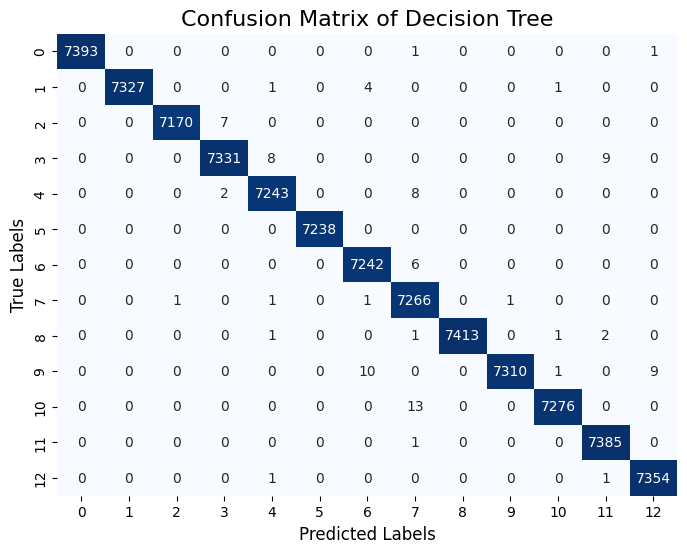

Naive Bayes - Training Time: 0.1281 seconds
Naive Bayes - Model Size: 1.97 KB
Naive Bayes - Memory Usage: 2716.22 MB
Naive Bayes - Prediction Time: 0.0366 seconds
Naive Bayes - Accuracy: 0.2538
Naive Bayes - Precision: 0.2768
Naive Bayes - Recall: 0.2538
Naive Bayes - F1-score: 0.2192


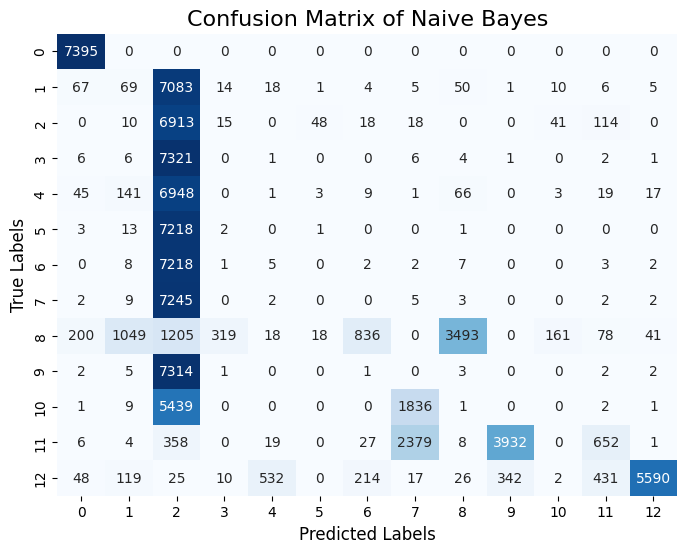

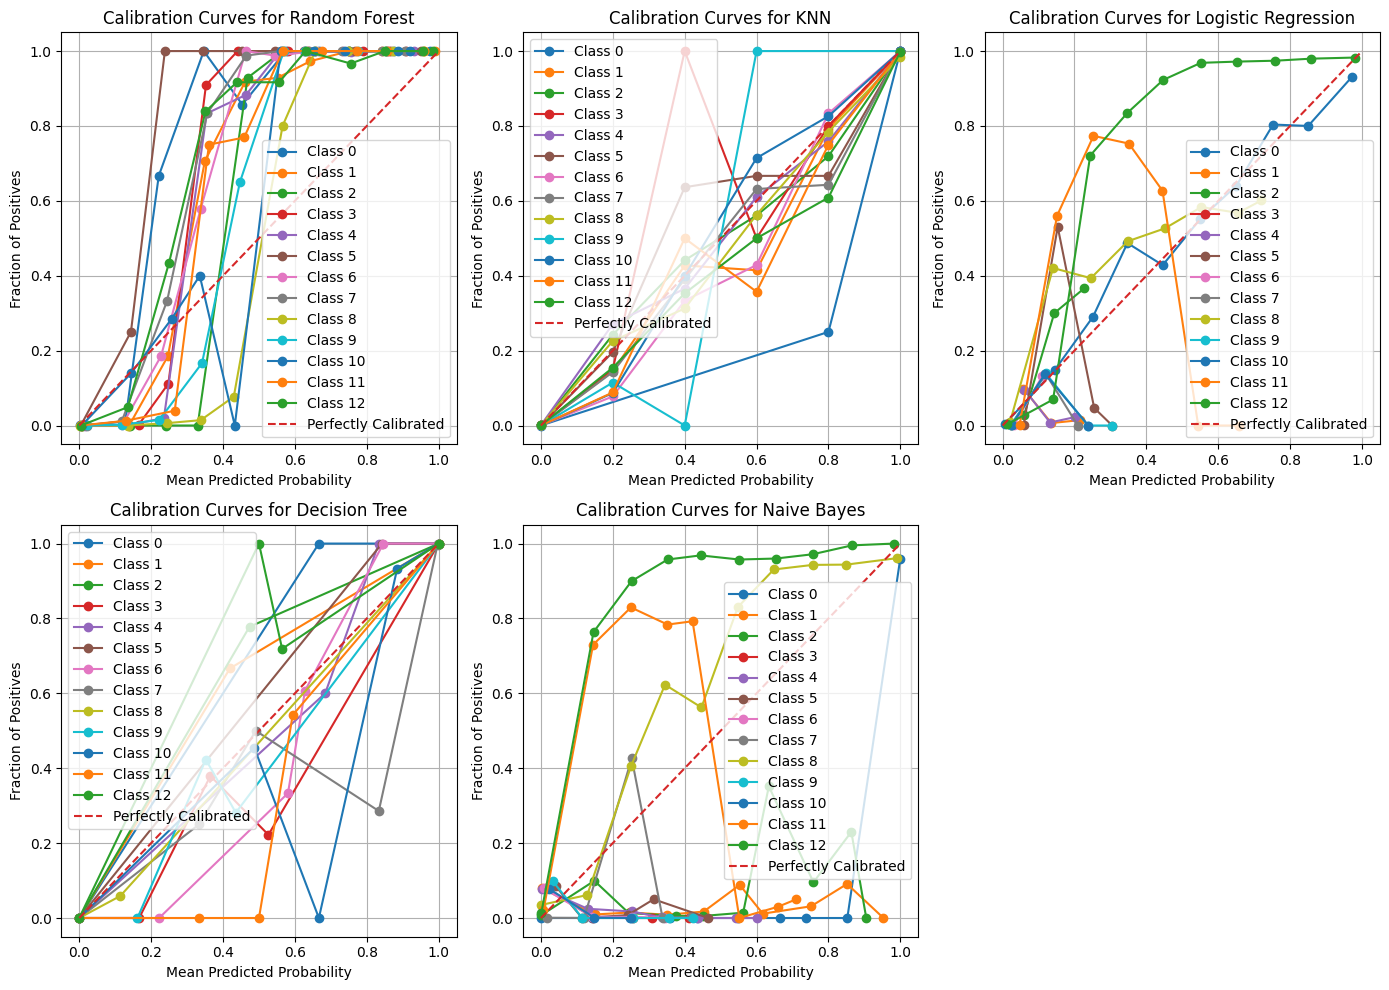

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil
from sklearn.preprocessing import label_binarize

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
lr_classifier = LogisticRegression(max_iter=1000)
dt_classifier = DecisionTreeClassifier(max_depth=10, random_state=42)
nb_classifier = GaussianNB()

# List of classifiers
classifiers = {
    'Random Forest': rf_classifier,
    'KNN': knn_classifier,
    'Logistic Regression': lr_classifier,
    'Decision Tree': dt_classifier,
    'Naive Bayes': nb_classifier
}

# Train each classifier and generate predictions
results = {}
for name, clf in classifiers.items():
    start_train_time = time.time()
    clf.fit(X_train, y_train)
    end_train_time = time.time()
    training_time = end_train_time - start_train_time

    # Save model size
    joblib.dump(clf, f'{name.lower().replace(" ", "_")}_model.pkl')
    model_size = os.path.getsize(f'{name.lower().replace(" ", "_")}_model.pkl')

    # Measure memory usage
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

    # Measure prediction time
    start_pred_time = time.time()
    y_pred = clf.predict(X_test)
    end_pred_time = time.time()
    prediction_time = end_pred_time - start_pred_time

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'training_time': training_time,
        'model_size': model_size / 1024,  # Convert bytes to kilobytes
        'memory_usage': memory_usage,
        'prediction_time': prediction_time,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    print(f'{name} - Training Time: {training_time:.4f} seconds')
    print(f'{name} - Model Size: {model_size / 1024:.2f} KB')
    print(f'{name} - Memory Usage: {memory_usage:.2f} MB')
    print(f'{name} - Prediction Time: {prediction_time:.4f} seconds')
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(f"{name} - Precision: {precision:.4f}")
    print(f"{name} - Recall: {recall:.4f}")
    print(f"{name} - F1-score: {f1:.4f}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix of {name}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.show()

# Generate calibration curves
plt.figure(figsize=(14, 10))

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.unique(Y))
n_classes = y_test_binarized.shape[1]

for name, clf in classifiers.items():
    plt.subplot(2, 3, list(classifiers.keys()).index(name) + 1)
    for i in range(n_classes):
        if hasattr(clf, "predict_proba"):
            y_prob = clf.predict_proba(X_test)[:, i]
        else:  # For classifiers without predict_proba method
            y_prob = clf.decision_function(X_test)
            y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to [0, 1]

        prob_true, prob_pred = calibration_curve(y_test_binarized[:, i], y_prob, n_bins=10)

        plt.plot(prob_pred, prob_true, marker='o', label=f'Class {i}')

    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title(f'Calibration Curves for {name}')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Random Forest - Training Time: 25.4395 seconds
Random Forest - Model Size: 2666.75 KB
Random Forest - Memory Usage: 2789.90 MB
Random Forest - Prediction Time: 0.5739 seconds
Random Forest - Accuracy: 0.9980
Random Forest - Precision: 0.9980
Random Forest - Recall: 0.9980
Random Forest - F1-score: 0.9980


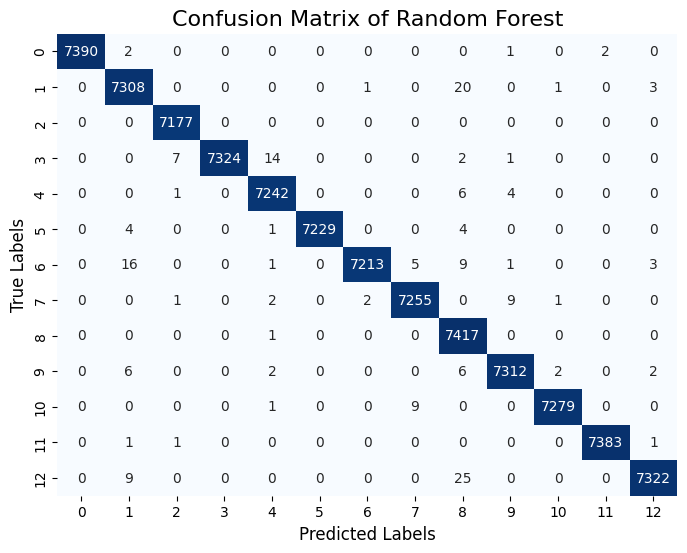

KNN - Training Time: 0.7605 seconds
KNN - Model Size: 25041.83 KB
KNN - Memory Usage: 2789.89 MB
KNN - Prediction Time: 9.7557 seconds
KNN - Accuracy: 0.9935
KNN - Precision: 0.9936
KNN - Recall: 0.9935
KNN - F1-score: 0.9935


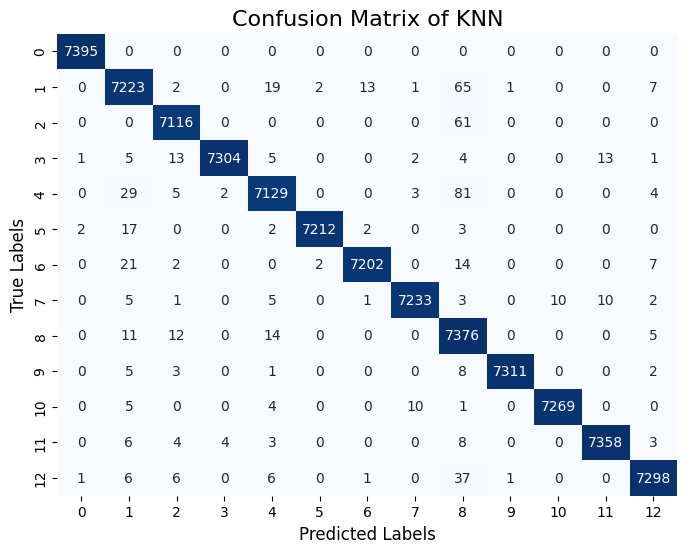

Logistic Regression - Training Time: 131.2538 seconds
Logistic Regression - Model Size: 1.67 KB
Logistic Regression - Memory Usage: 2789.90 MB
Logistic Regression - Prediction Time: 0.0184 seconds
Logistic Regression - Accuracy: 0.4040
Logistic Regression - Precision: 0.3786
Logistic Regression - Recall: 0.4040
Logistic Regression - F1-score: 0.3529


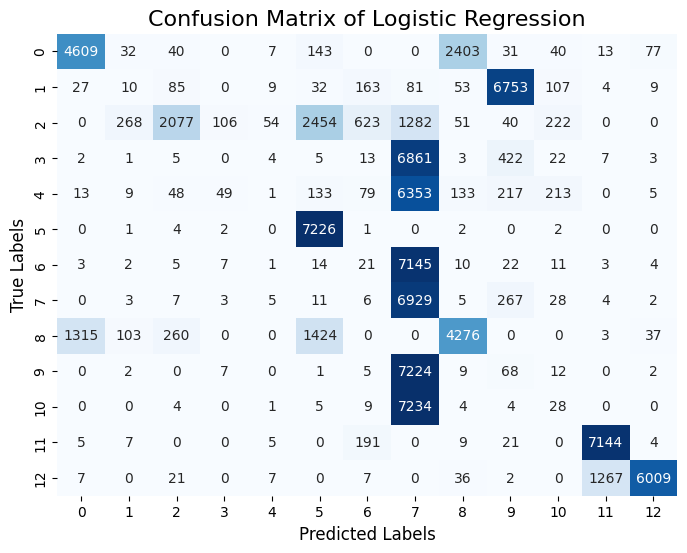

Decision Tree - Training Time: 0.9921 seconds
Decision Tree - Model Size: 55.56 KB
Decision Tree - Memory Usage: 2789.90 MB
Decision Tree - Prediction Time: 0.0119 seconds
Decision Tree - Accuracy: 0.9990
Decision Tree - Precision: 0.9990
Decision Tree - Recall: 0.9990
Decision Tree - F1-score: 0.9990


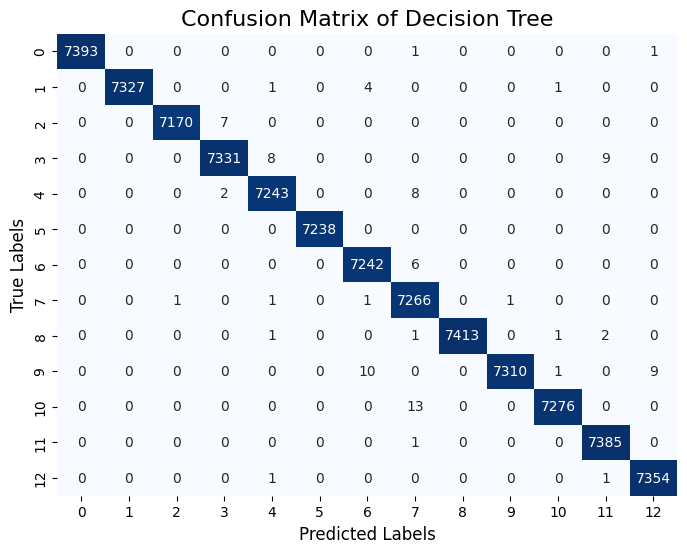

Naive Bayes - Training Time: 0.1296 seconds
Naive Bayes - Model Size: 1.97 KB
Naive Bayes - Memory Usage: 2789.90 MB
Naive Bayes - Prediction Time: 0.0371 seconds
Naive Bayes - Accuracy: 0.2538
Naive Bayes - Precision: 0.2768
Naive Bayes - Recall: 0.2538
Naive Bayes - F1-score: 0.2192


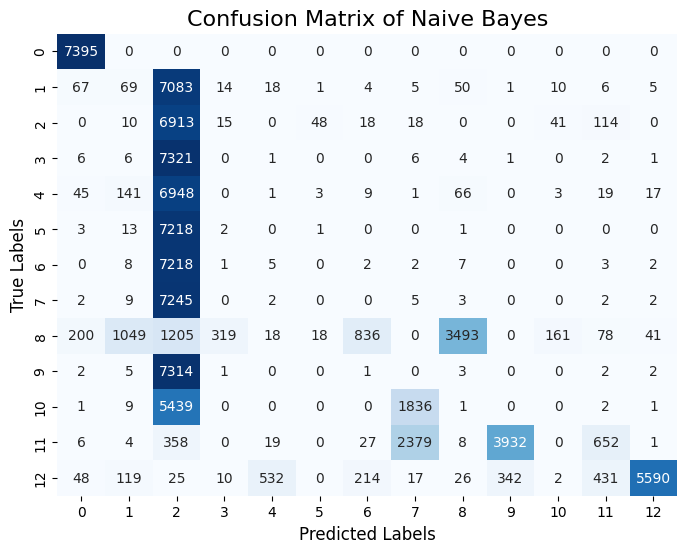

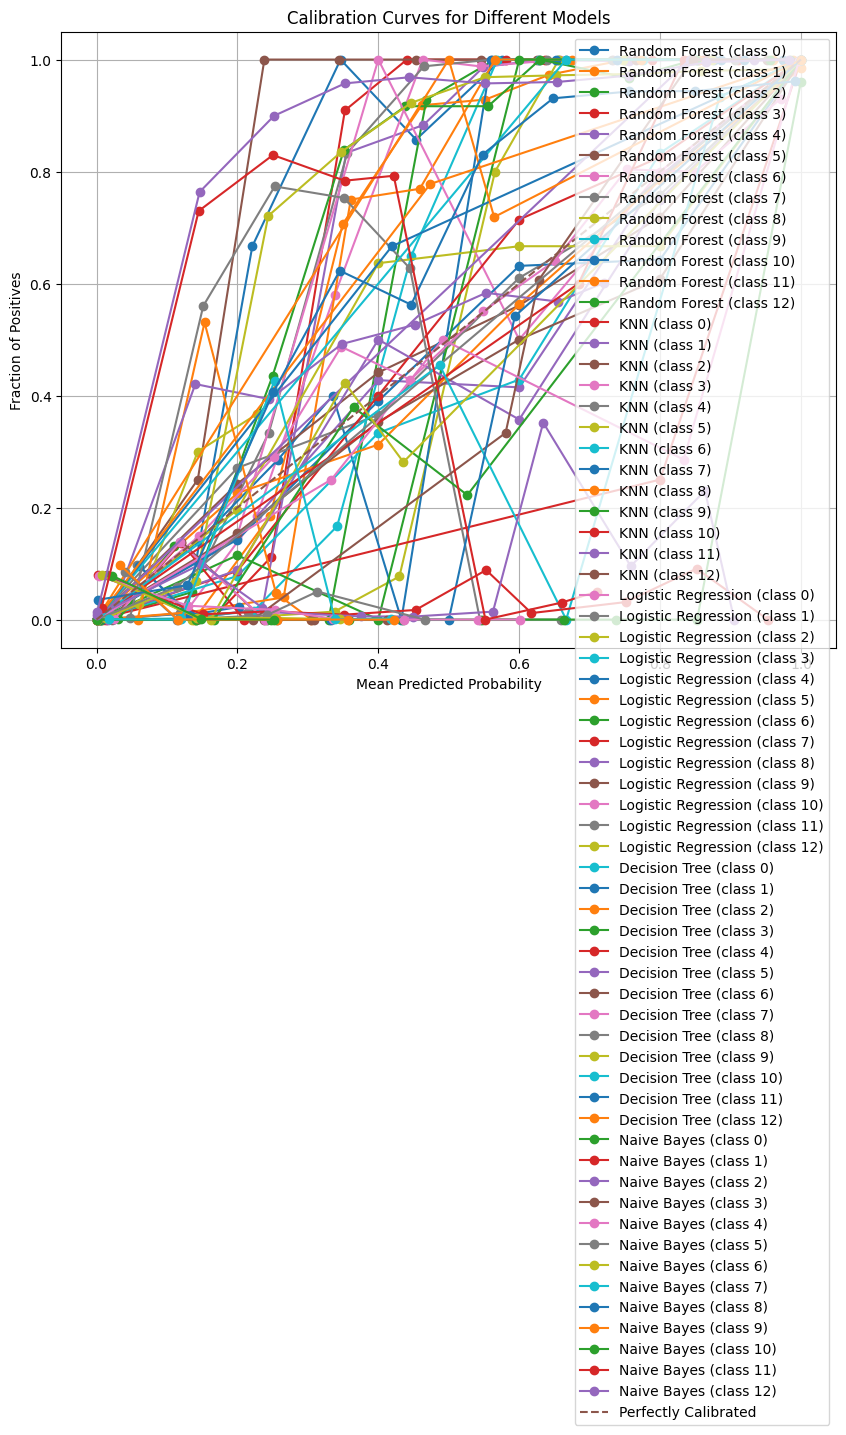

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
import psutil

# Assuming X contains input features and Y contains target labels
# Split the data into training and testing sets
X = rf_scaled_df.drop('label_encoder', axis=1)
Y = rf_scaled_df['label_encoder']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
lr_classifier = LogisticRegression(max_iter=1000)
dt_classifier = DecisionTreeClassifier(max_depth=10, random_state=42)
nb_classifier = GaussianNB()

# List of classifiers
classifiers = {
    'Random Forest': rf_classifier,
    'KNN': knn_classifier,
    'Logistic Regression': lr_classifier,
    'Decision Tree': dt_classifier,
    'Naive Bayes': nb_classifier
}

# Train each classifier and generate predictions
results = {}
for name, clf in classifiers.items():
    start_train_time = time.time()
    clf.fit(X_train, y_train)
    end_train_time = time.time()
    training_time = end_train_time - start_train_time

    # Save model size
    joblib.dump(clf, f'{name.lower().replace(" ", "_")}_model.pkl')
    model_size = os.path.getsize(f'{name.lower().replace(" ", "_")}_model.pkl')

    # Measure memory usage
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / 1024 ** 2  # Convert bytes to megabytes

    # Measure prediction time
    start_pred_time = time.time()
    y_pred = clf.predict(X_test)
    end_pred_time = time.time()
    prediction_time = end_pred_time - start_pred_time

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'training_time': training_time,
        'model_size': model_size / 1024,  # Convert bytes to kilobytes
        'memory_usage': memory_usage,
        'prediction_time': prediction_time,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    print(f'{name} - Training Time: {training_time:.4f} seconds')
    print(f'{name} - Model Size: {model_size / 1024:.2f} KB')
    print(f'{name} - Memory Usage: {memory_usage:.2f} MB')
    print(f'{name} - Prediction Time: {prediction_time:.4f} seconds')
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(f"{name} - Precision: {precision:.4f}")
    print(f"{name} - Recall: {recall:.4f}")
    print(f"{name} - F1-score: {f1:.4f}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix of {name}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.show()

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.unique(Y))
n_classes = y_test_binarized.shape[1]

# Generate calibration curves for all classifiers on a single graph
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)
    else:  # For classifiers without predict_proba method
        y_prob = clf.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to [0, 1]

    for i in range(n_classes):
        prob_true, prob_pred = calibration_curve(y_test_binarized[:, i], y_prob[:, i], n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=f'{name} (class {i})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves for Different Models')
plt.legend()
plt.grid()
plt.show()
